Exploratory data analysis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('/content/Demo_data_2.csv')

def sku_profiling(data, date_column='keys', freq='M'):
    """
    Perform SKU profiling based on seasonality and trend analysis.

    Parameters:
    data (pd.DataFrame): DataFrame containing SKU data with date and sales columns.
    date_column (str): Name of the column containing dates.
    freq (str): Frequency of the time series data (e.g., 'M' for monthly, 'W' for weekly).

    Returns:
    pd.DataFrame: DataFrame with SKU profiling results including seasonality and trend classification.
    """

    # Ensure date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column], format='%d-%m-%Y')

    # Initialize results list
    profiling_results = []

    # Loop over each product column (excluding the date column)
    product_columns = [col for col in data.columns if col != date_column]
    for product in product_columns:
        sku_data = data[[date_column, product]].set_index(date_column).resample(freq).sum()

        # Handle cases with insufficient data
        if len(sku_data) < 12:
            profiling_results.append({
                'Product': product,
                'Seasonality': 'Insufficient Data',
                'Trend': 'Insufficient Data'
            })
            continue

        # Decompose the time series
        decomposition = seasonal_decompose(sku_data[product], model='additive', period=12)

        # Check for seasonality
        seasonal_strength = np.std(decomposition.seasonal) / np.std(decomposition.trend.dropna())
        seasonality = 'Seasonal' if seasonal_strength > 0.1 else 'Non-Seasonal'

        # Perform trend analysis using linear regression
        time = np.arange(len(sku_data)).reshape(-1, 1)
        sales_values = sku_data[product].values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(time, sales_values)
        trend_slope = model.coef_[0][0]

        if trend_slope > 0:
            trend = 'Growing'
        elif trend_slope < 0:
            trend = 'Declining'
        else:
            trend = 'Stable'

        # Append results for this product
        profiling_results.append({
            'Product': product,
            'Seasonality': seasonality,
            'Trend': trend
        })

    # Convert results to DataFrame
    results_df = pd.DataFrame(profiling_results)

    return results_df

# Run the profiling function
profiling_results = sku_profiling(df)

# Display the results
print(profiling_results)


           Product   Seasonality      Trend
0  LevelA_Product1  Non-Seasonal    Growing
1  LevelA_Product2      Seasonal    Growing
2  LevelA_Product3      Seasonal    Growing
3  LavelB_Product1      Seasonal    Growing
4  LavelB_Product2      Seasonal    Growing
5  LavelB_Product3      Seasonal  Declining
6  LevelC_Product1      Seasonal    Growing


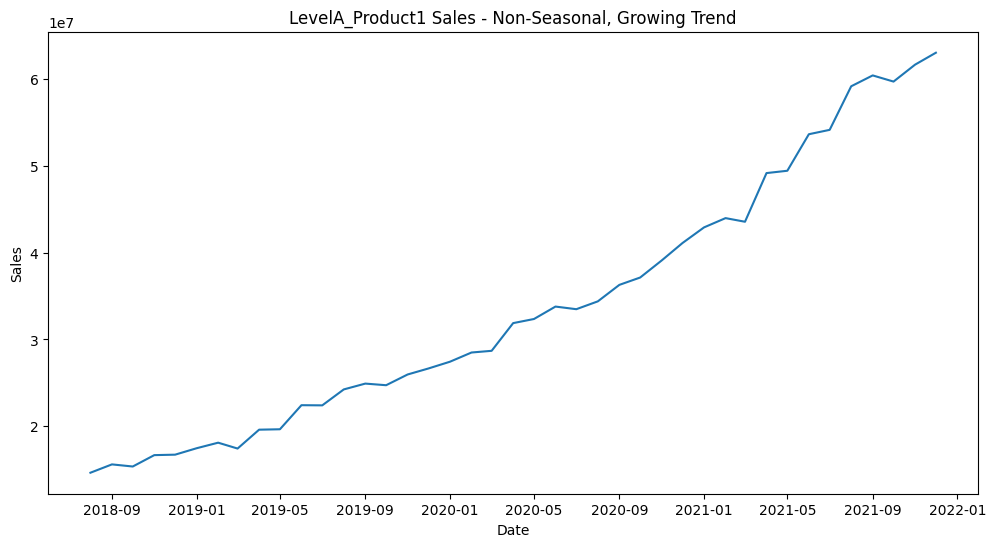

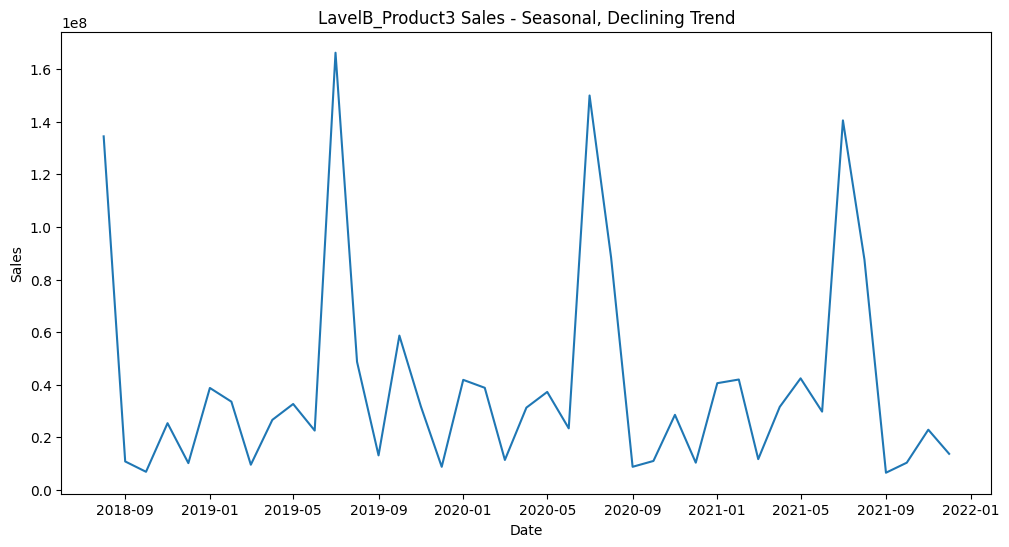

In [33]:
# prompt: generate the code to plot first and 6 product from the /content/Demo_data_2.csv and define it is seasonal or non seasonal and which type of tread it has growing ,declining or stable

import matplotlib.pyplot as plt
# Get the first and sixth product names
first_product = profiling_results['Product'].iloc[0]
sixth_product = profiling_results['Product'].iloc[5]

# Plot the time series for the first product
plt.figure(figsize=(12, 6))
plt.plot(df['keys'], df[first_product])
plt.title(f"{first_product} Sales - {profiling_results[profiling_results['Product'] == first_product]['Seasonality'].values[0]}, {profiling_results[profiling_results['Product'] == first_product]['Trend'].values[0]} Trend")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Plot the time series for the sixth product
plt.figure(figsize=(12, 6))
plt.plot(df['keys'], df[sixth_product])
plt.title(f"{sixth_product} Sales - {profiling_results[profiling_results['Product'] == sixth_product]['Seasonality'].values[0]}, {profiling_results[profiling_results['Product'] == sixth_product]['Trend'].values[0]} Trend")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [9]:
# --- 1. Basic Exploration ---
print(df.head())  # View first few rows
print(df.info())  # Get column data types and non-null counts
print(df.describe())  # Summary statistics for numerical columns


        keys  LevelA_Product1  LevelA_Product2  LevelA_Product3  \
0 2018-08-01      14647922.49       3717633.74       3275312.35   
1 2018-09-01      15608067.80        222327.11       4227336.28   
2 2018-10-01      15363740.18        751813.50      10680416.98   
3 2018-11-01      16675197.89       3728260.60       6018335.29   
4 2018-12-01      16728096.20       1079681.16      11494832.81   

   LavelB_Product1  LavelB_Product2  LavelB_Product3  LevelC_Product1  
0     1.037684e+08       4275079.63     1.344623e+08       4199223.87  
1     1.392222e+07       3380050.69     1.077202e+07       2972711.44  
2     8.716557e+06       5822013.56     6.837190e+06       6290499.68  
3     5.489774e+07       5263469.24     2.533117e+07       3567469.58  
4     1.943808e+07       4532468.87     1.013160e+07       3303197.99  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  -----

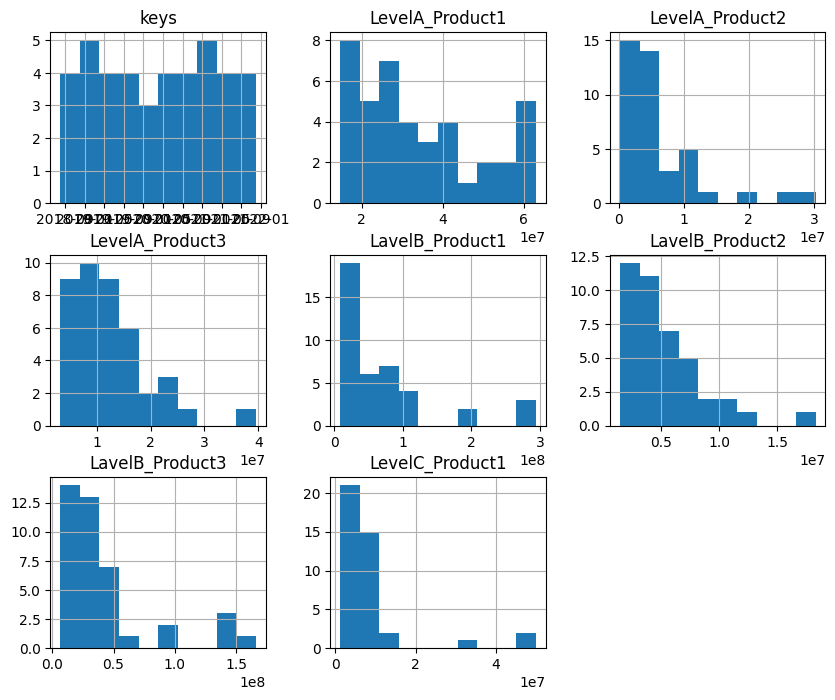

In [10]:
# --- 2. Visualizations ---
# Histograms for numerical columns
df.hist(figsize=(10, 8))
plt.show()

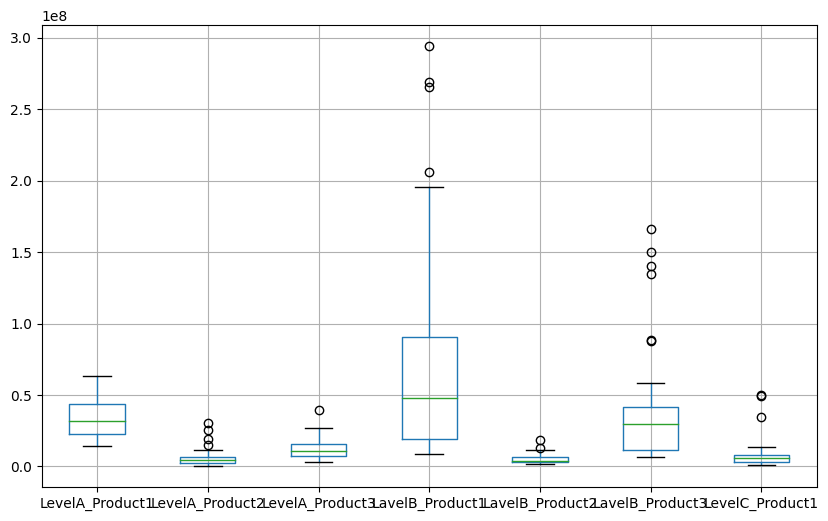

In [11]:
# Boxplots for numerical columns (to identify potential outliers)
df.boxplot(figsize=(10, 6))
plt.show()


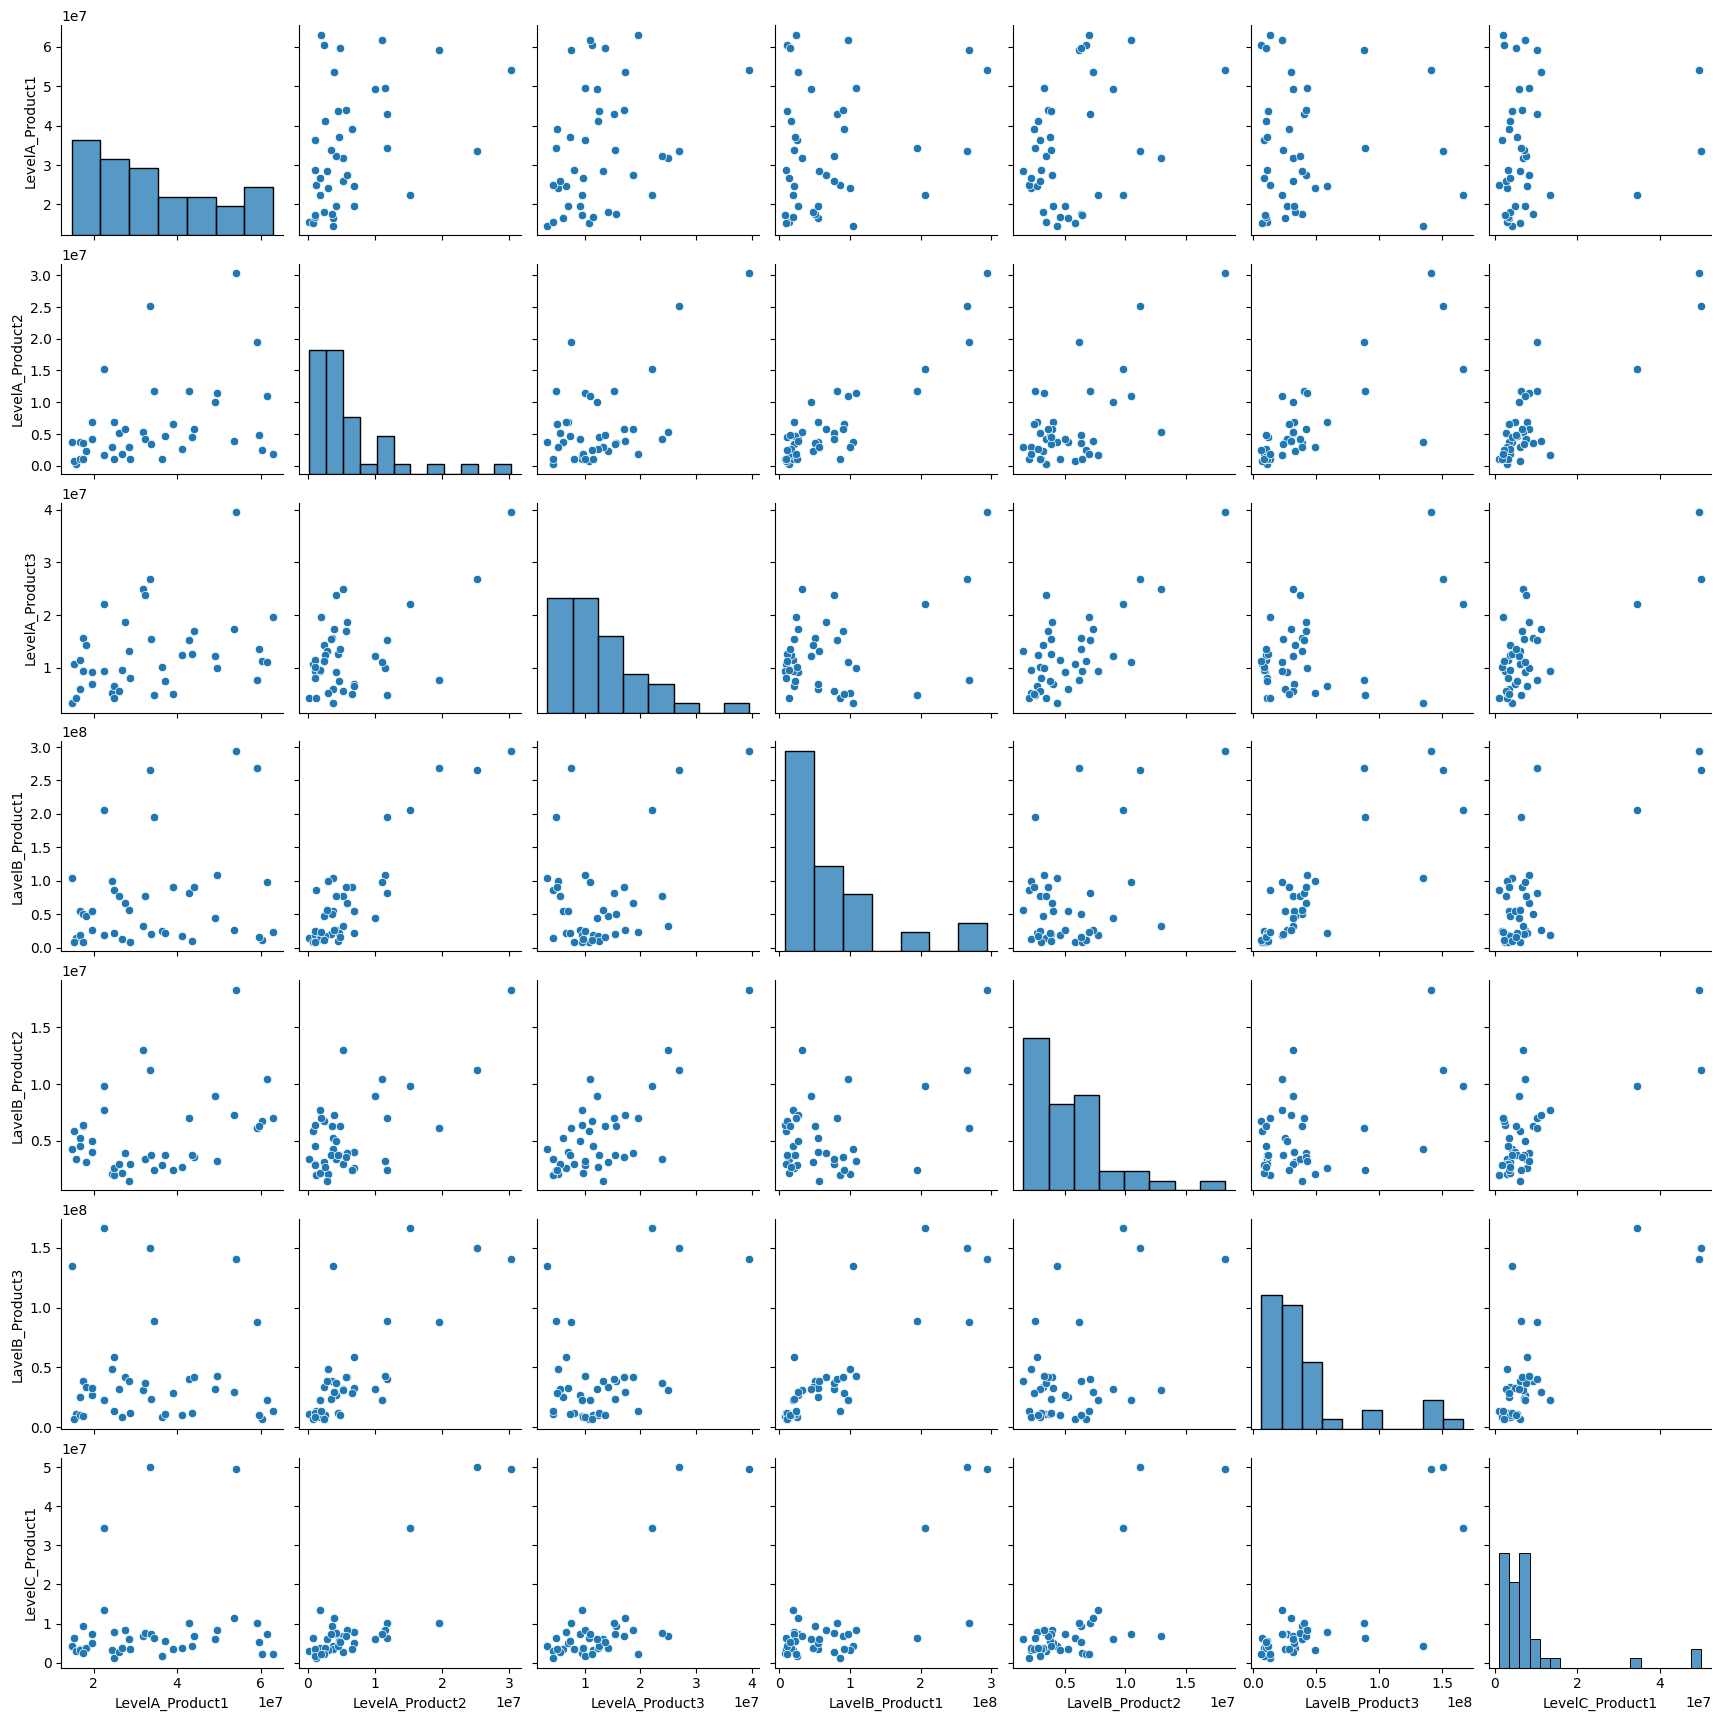

In [12]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df)
plt.show()


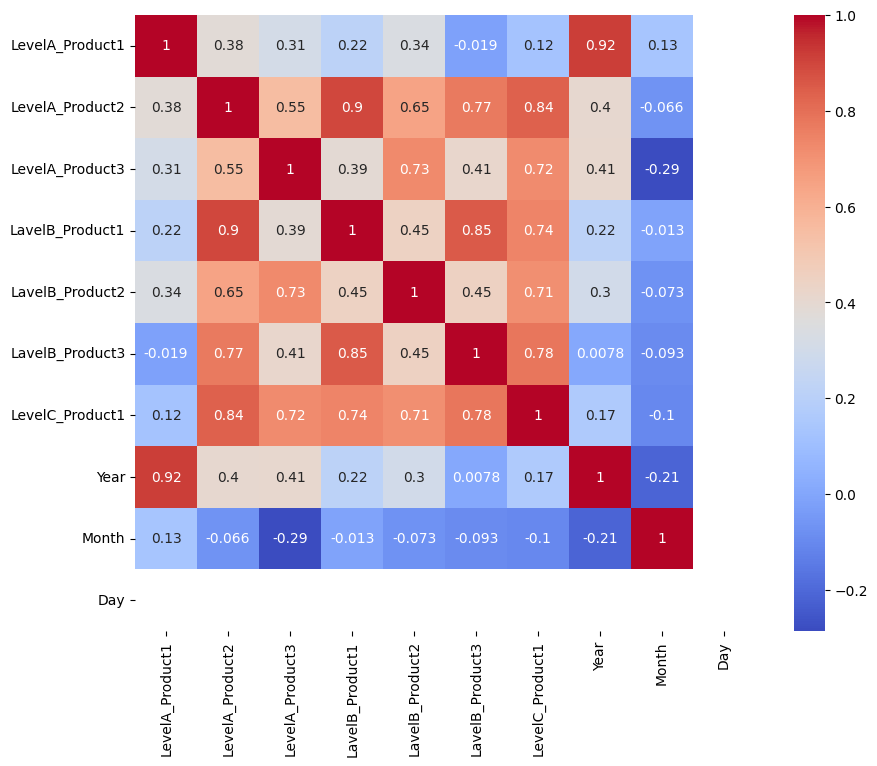

In [13]:
# --- 1. Convert date column to datetime object ---
df['keys'] = pd.to_datetime(df['keys'])  # Replace 'DateColumn' with the actual name of your date column

# --- 2. Extract numerical features from the date ---
df['Year'] = df['keys'].dt.year
df['Month'] = df['keys'].dt.month
df['Day'] = df['keys'].dt.day

# --- 3. Calculate correlation on numerical columns only ---
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

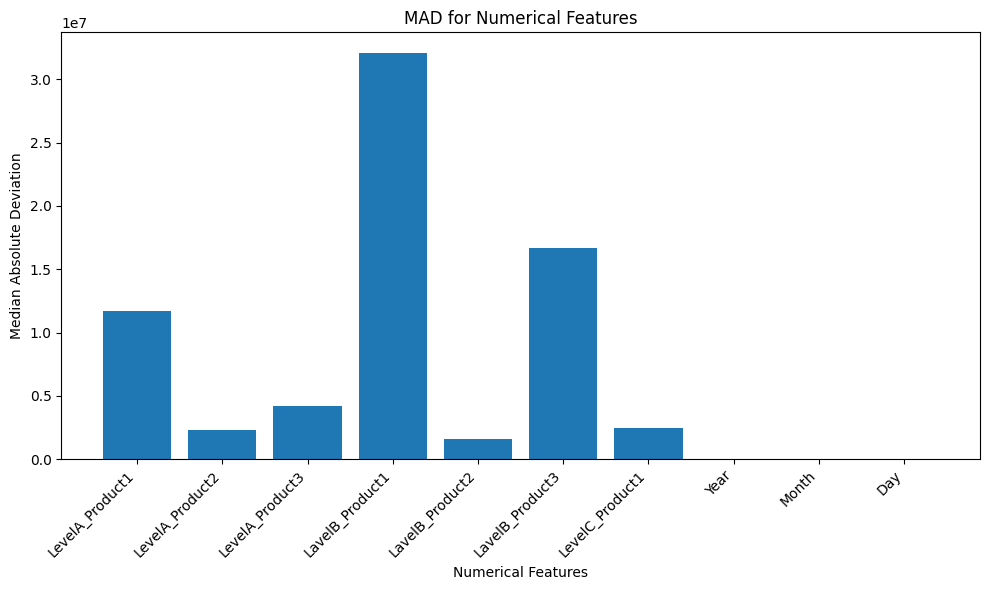

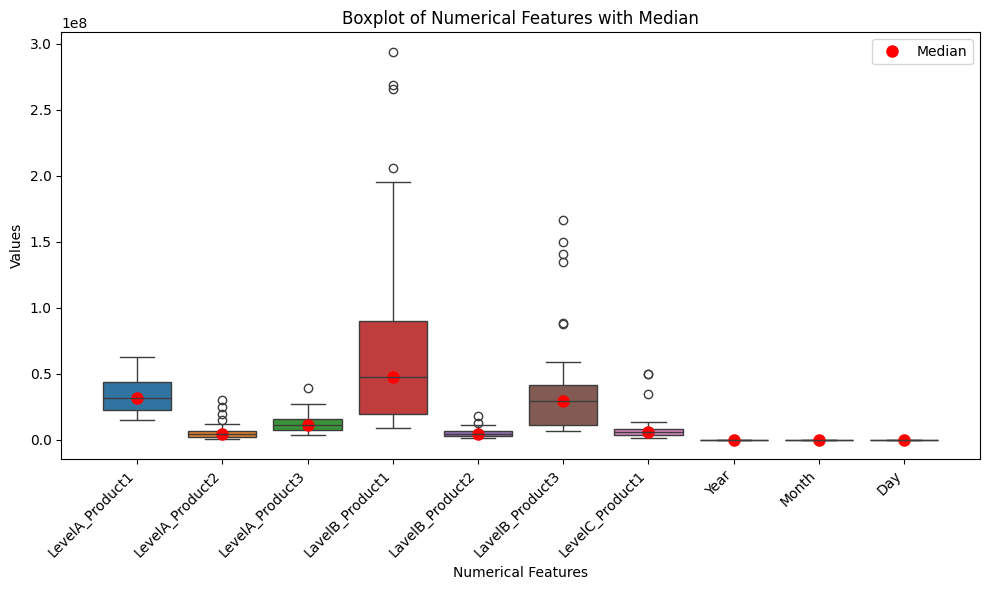

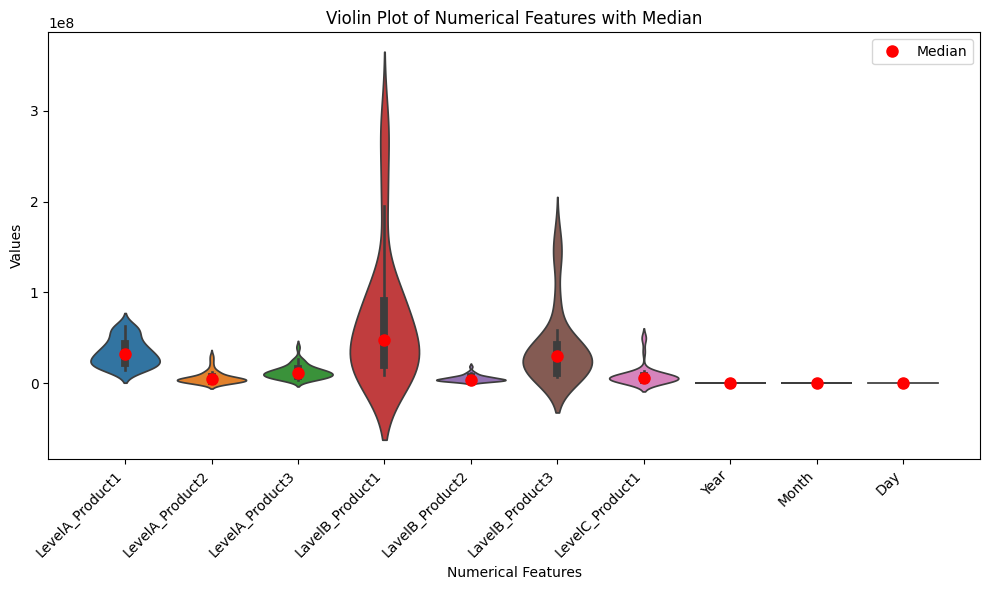

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Calculate MAD for each numerical column
mad_values = median_abs_deviation(numerical_df, axis=0)

# Visualization 1: Bar plot
plt.figure(figsize=(10, 6))
plt.bar(numerical_df.columns, mad_values)
plt.xlabel('Numerical Features')
plt.ylabel('Median Absolute Deviation')
plt.title('MAD for Numerical Features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Visualization 2: Boxplot with median highlighted
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_df)
medians = numerical_df.median()
plt.plot(medians.index, medians.values, 'ro', markersize=8, label='Median')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.title('Boxplot of Numerical Features with Median')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 3: Violin plot with median marked
plt.figure(figsize=(10, 6))
sns.violinplot(data=numerical_df)
plt.plot(medians.index, medians.values, 'ro', markersize=8, label='Median')
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.title('Violin Plot of Numerical Features with Median')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Calculate IQR for each numerical column
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers, keeping 'keys' column
# Create a boolean mask for outliers
outlier_mask = ((numerical_df < lower_bound) | (numerical_df > upper_bound)).any(axis=1)

# Invert the mask to select non-outlier rows and keep 'keys'
filtered_df = df[~outlier_mask]

# Display the shape of the original and filtered DataFrames
print("Original DataFrame shape:", df.shape) # Use df here to include 'keys'
print("Filtered DataFrame shape:", filtered_df.shape)

Original DataFrame shape: (41, 11)
Filtered DataFrame shape: (34, 11)


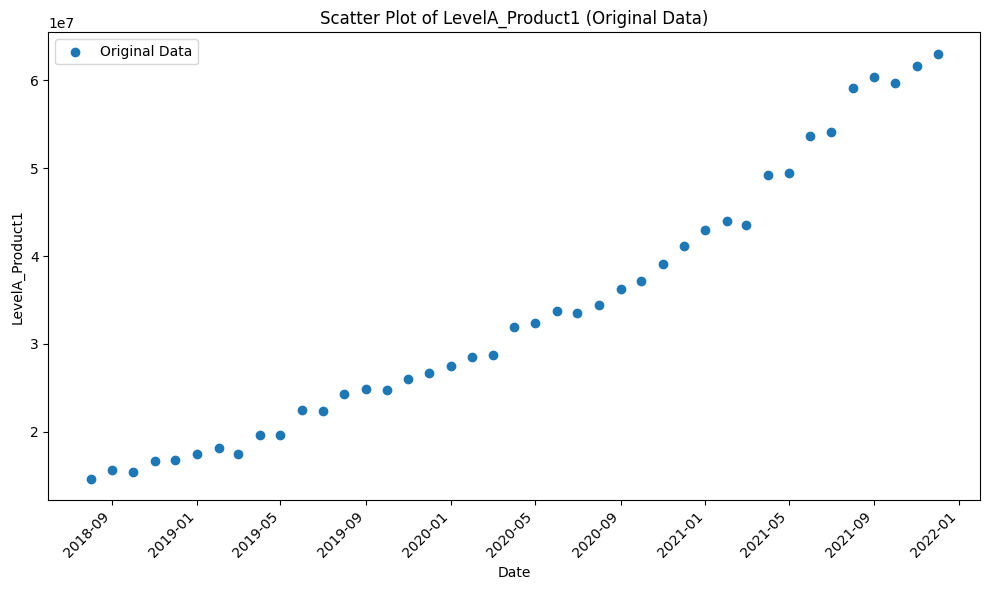

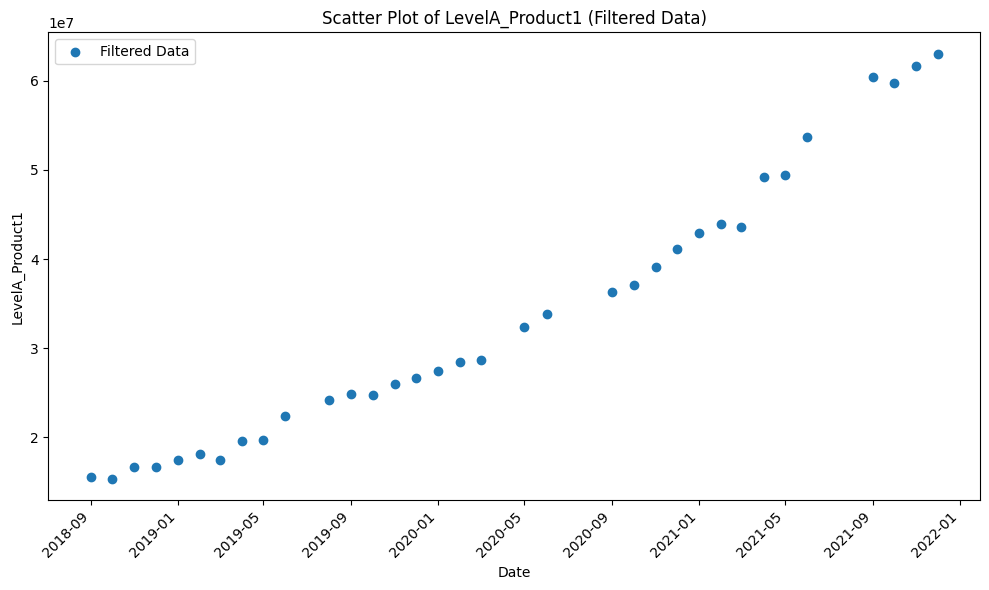

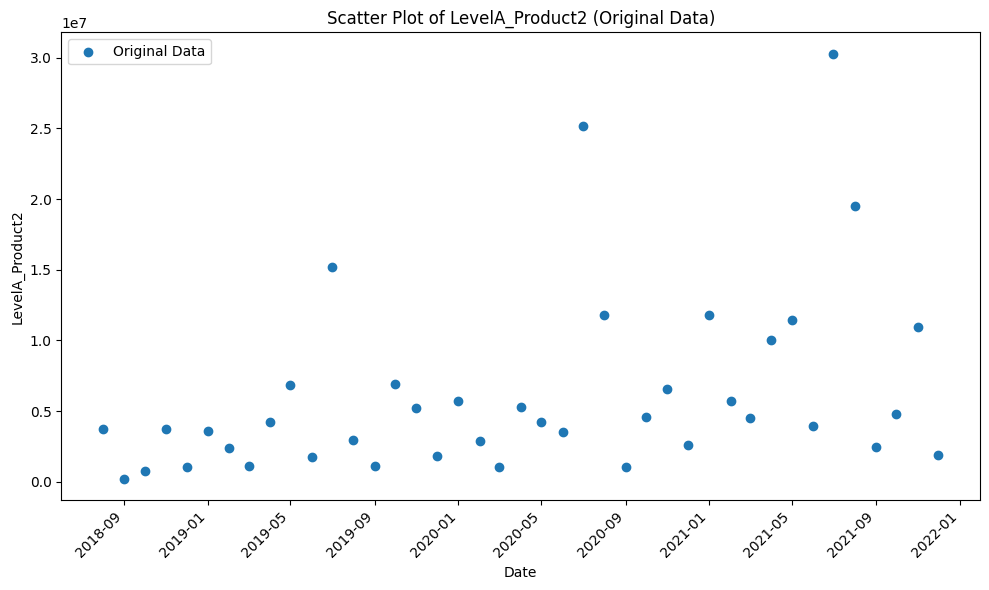

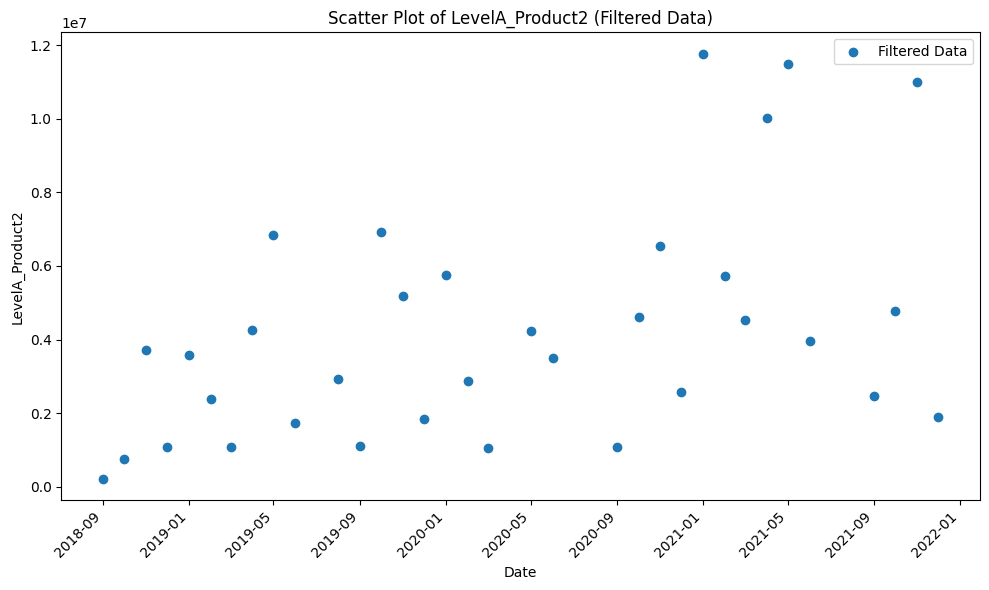

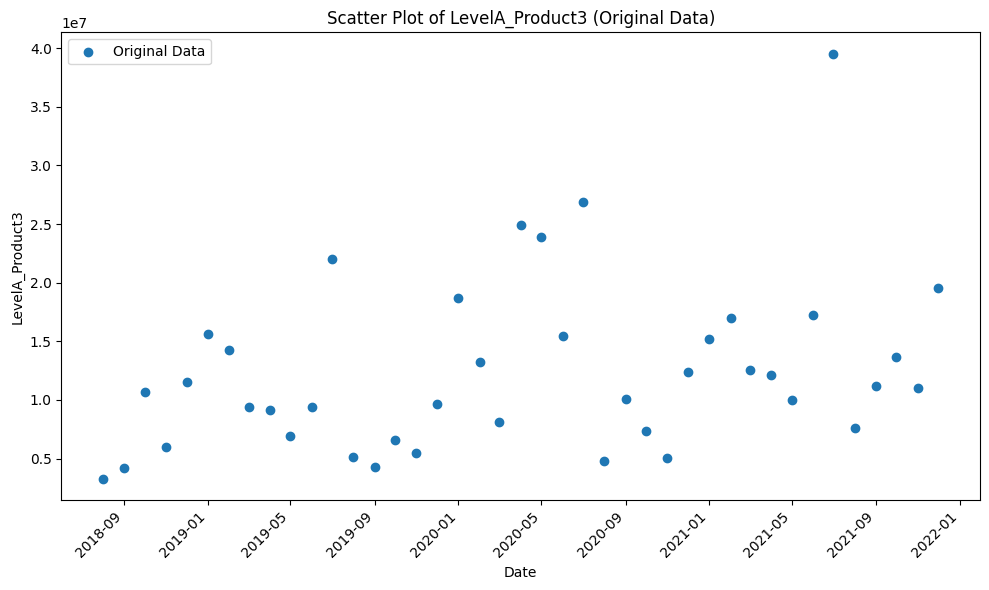

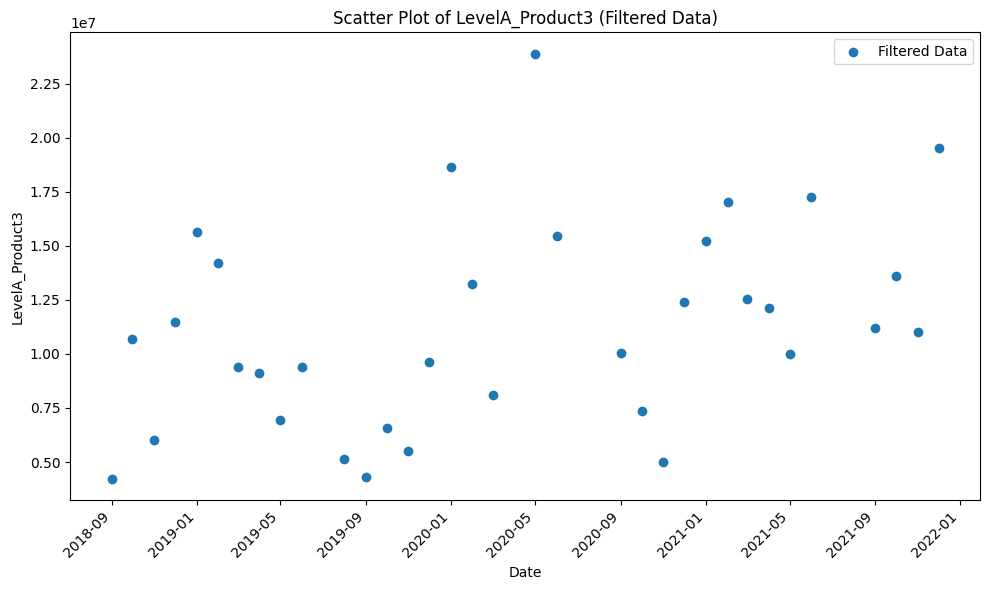

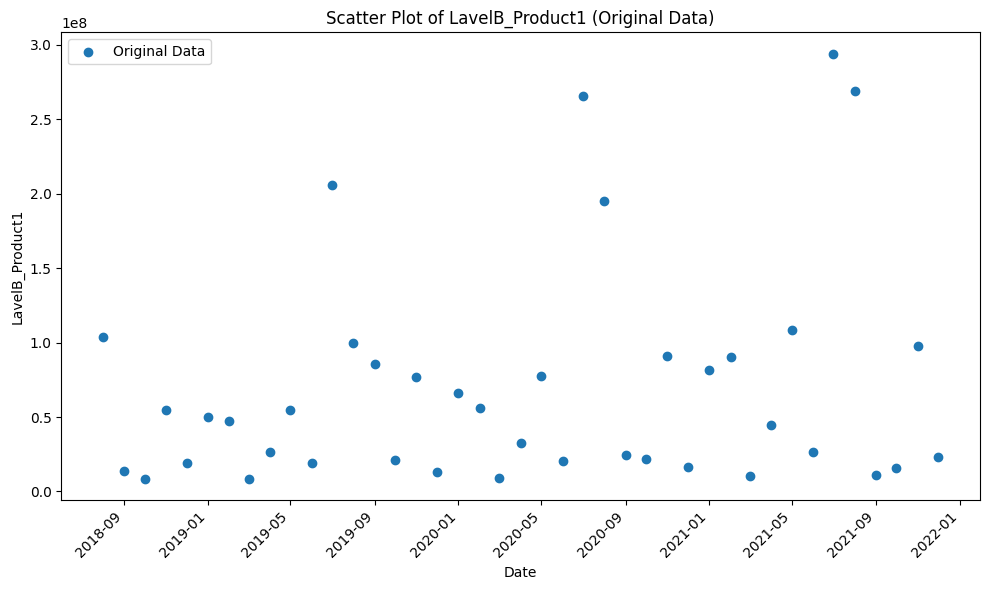

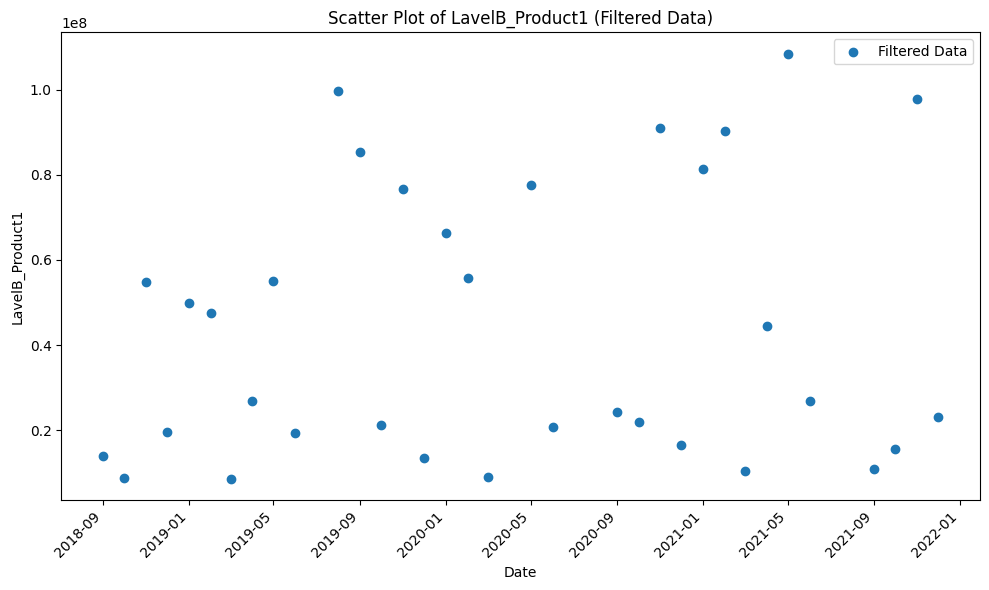

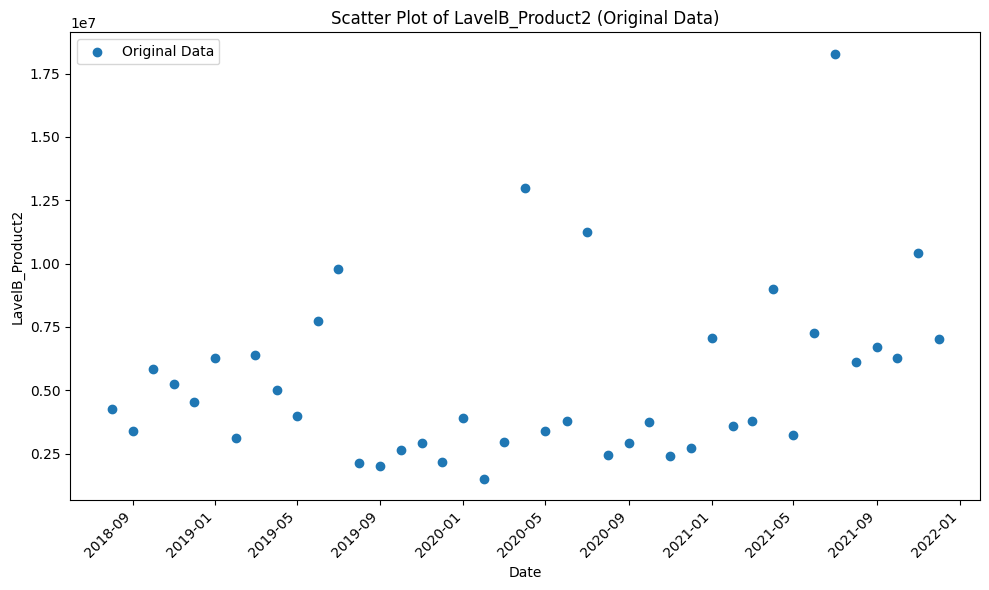

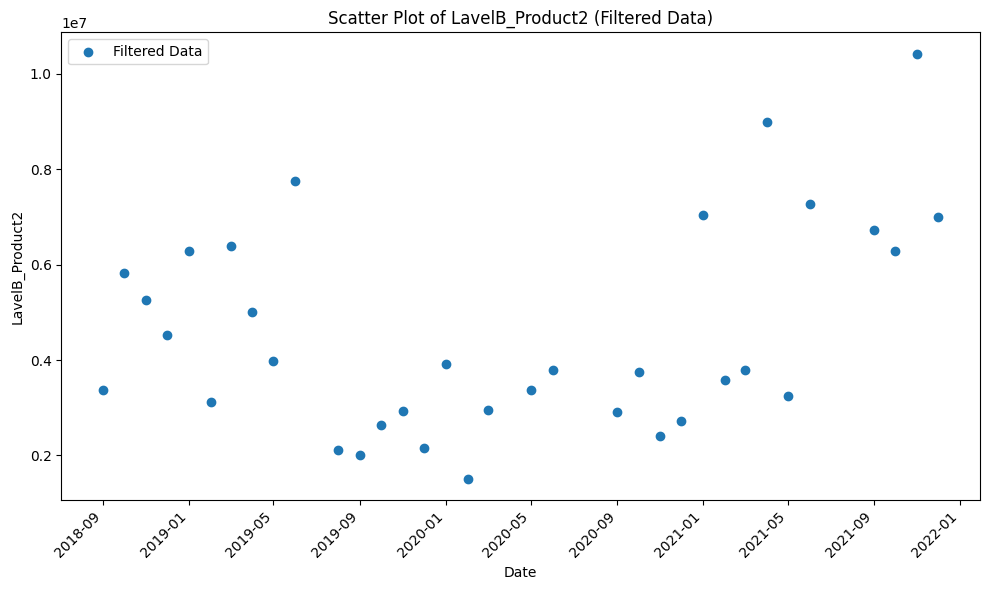

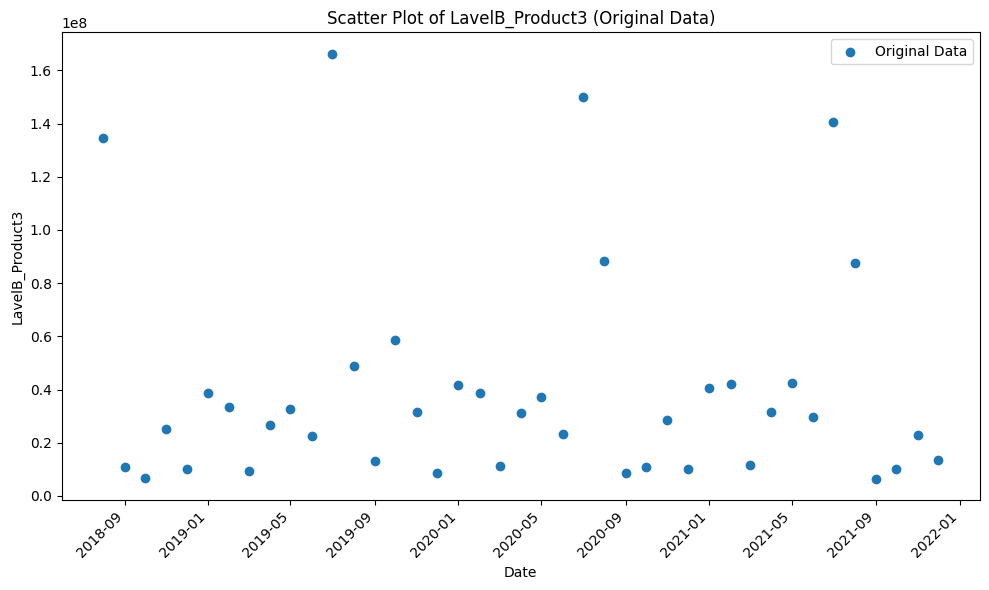

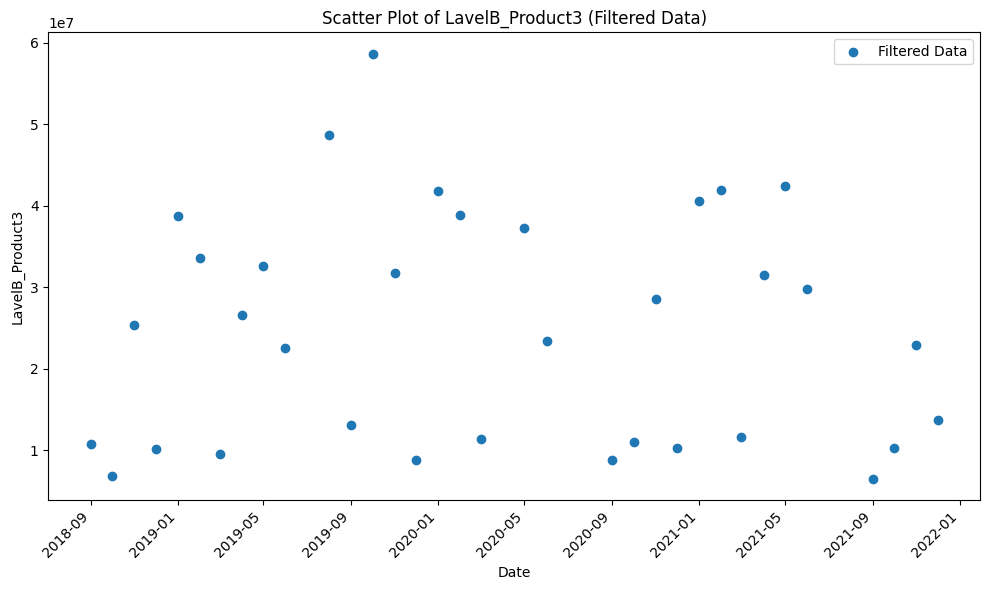

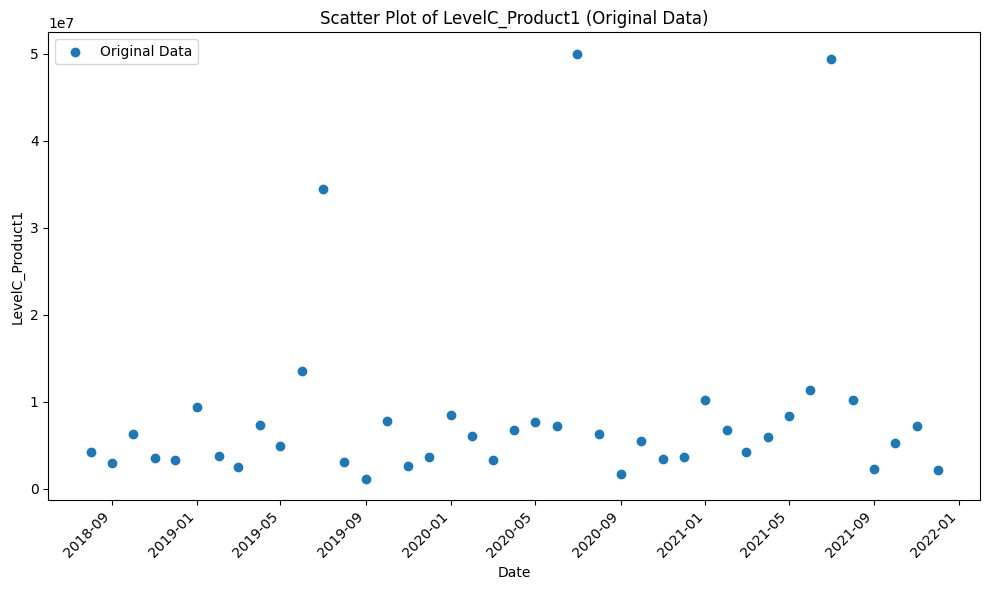

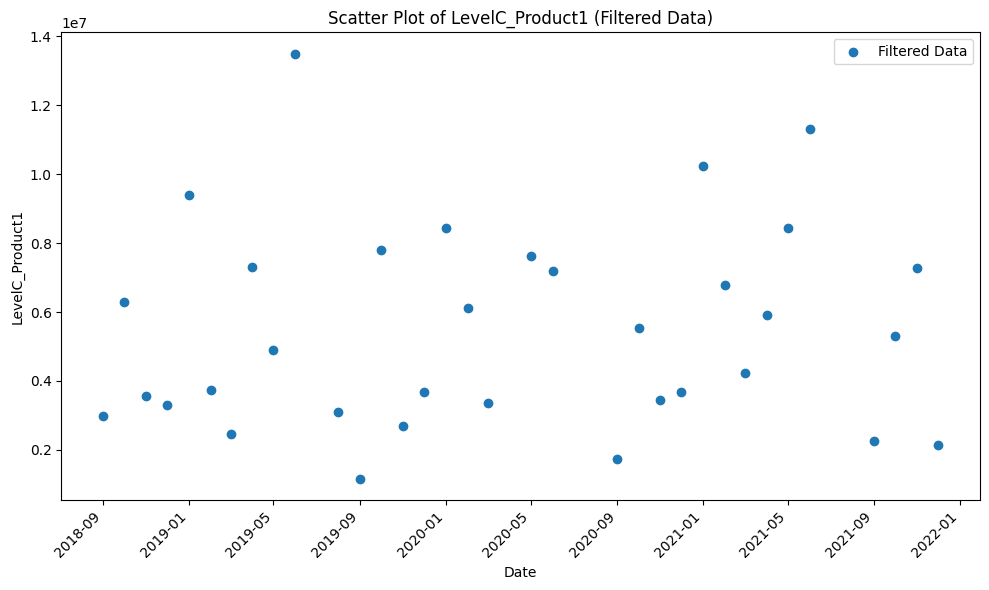

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# Products to analyze
products = ['LevelA_Product1', 'LevelA_Product2', 'LevelA_Product3',
            'LavelB_Product1', 'LavelB_Product2', 'LavelB_Product3',
            'LevelC_Product1']


# Iterate through each product
for product in products:
    # Extract data for the current product, including the date
    product_data_original = df[['keys', product]].dropna()
    product_data_filtered = filtered_df[['keys', product]].dropna()

    # Scatter plot for original data
    plt.figure(figsize=(10, 6))
    plt.scatter(product_data_original['keys'], product_data_original[product], label='Original Data')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.title(f'Scatter Plot of {product} (Original Data)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Scatter plot for filtered data
    plt.figure(figsize=(10, 6))
    plt.scatter(product_data_filtered['keys'], product_data_filtered[product], label='Filtered Data')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.title(f'Scatter Plot of {product} (Filtered Data)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()




In [18]:
import pandas as pd

# Step 1: Load the existing CSV file
existing_csv = '/content/Demo_data_2.csv'
df = pd.read_csv(existing_csv)

# Step 3: Convert date columns to MM-DD-YYYY format
filtered_df['keys'] = pd.to_datetime(filtered_df['keys']).dt.strftime('%m-%d-%Y')

# Step 4: Save the filtered DataFrame to a new CSV file with the same format
new_csv = 'filtered_file.csv'
filtered_df.to_csv(new_csv, index=False)

print(f"Filtered data saved to '{new_csv}' with dates in MM-DD-YYYY format.")


Filtered data saved to 'filtered_file.csv' with dates in MM-DD-YYYY format.


<ipython-input-18-b179686731af>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['keys'] = pd.to_datetime(filtered_df['keys']).dt.strftime('%m-%d-%Y')


In [19]:
# prompt: generate the code to  delete the last 3 column named "Year","Month","Day" from filtered_file.csv

import pandas as pd
# Load the filtered CSV file
filtered_df = pd.read_csv('filtered_file.csv')

# Drop the last 3 columns
filtered_df = filtered_df.iloc[:, :-3]

# Save the modified DataFrame back to the CSV file
filtered_df.to_csv('filtered_file.csv', index=False)


Arima Model For all products

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

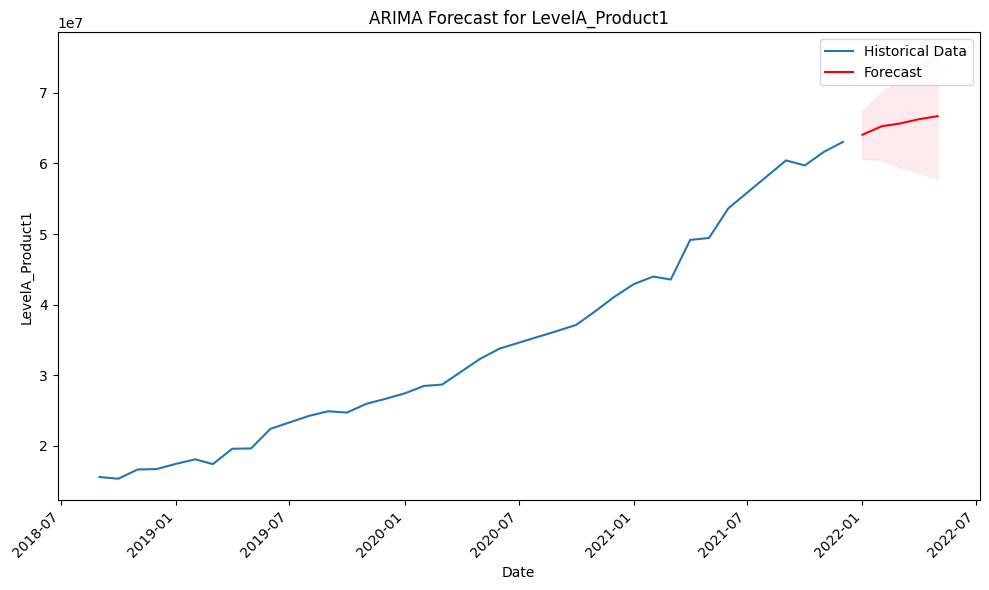

Forecasted values for LevelA_Product1:
2022-01-01: 64068554.53
2022-02-01: 65275153.83
2022-03-01: 65640390.50
2022-04-01: 66263277.44
2022-05-01: 66695414.15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

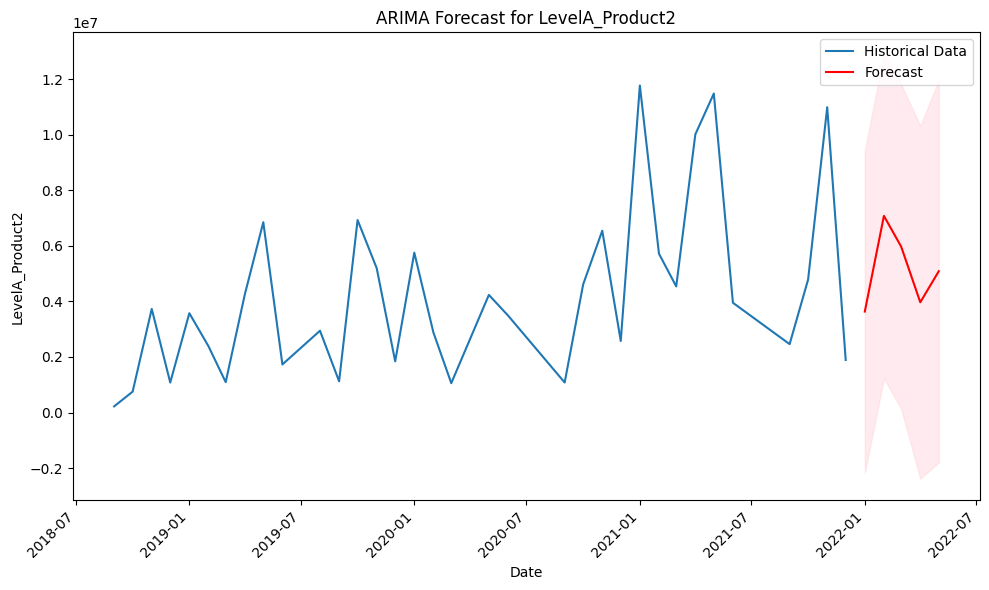

Forecasted values for LevelA_Product2:
2022-01-01: 3633677.08
2022-02-01: 7076412.43
2022-03-01: 5969601.08
2022-04-01: 3967419.30
2022-05-01: 5084317.25


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

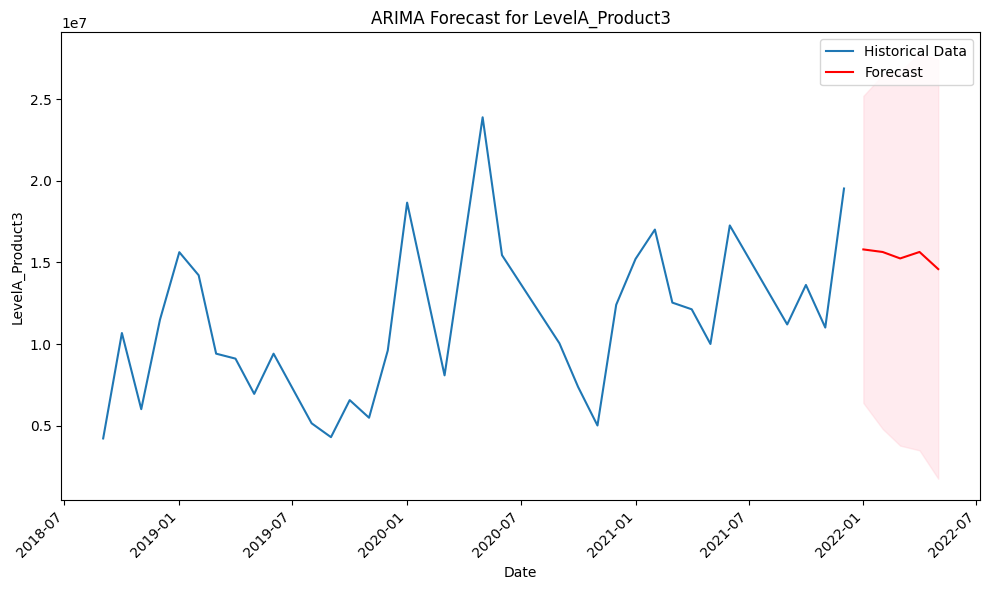

Forecasted values for LevelA_Product3:
2022-01-01: 15796420.69
2022-02-01: 15639146.65
2022-03-01: 15245431.01
2022-04-01: 15640967.27
2022-05-01: 14592873.71


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

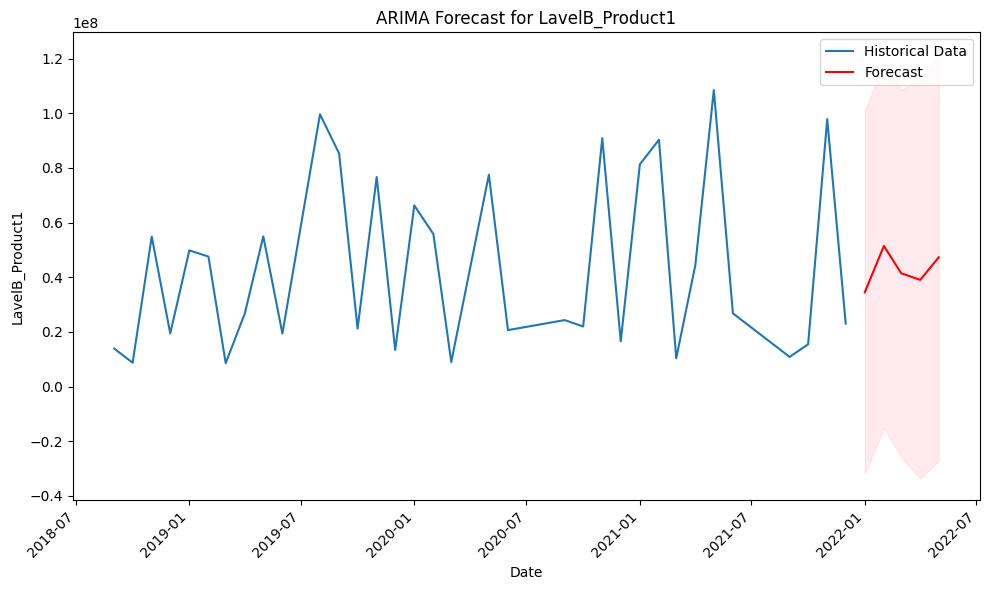

Forecasted values for LavelB_Product1:
2022-01-01: 34528134.61
2022-02-01: 51477158.24
2022-03-01: 41470418.10
2022-04-01: 39035132.33
2022-05-01: 47326163.60


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

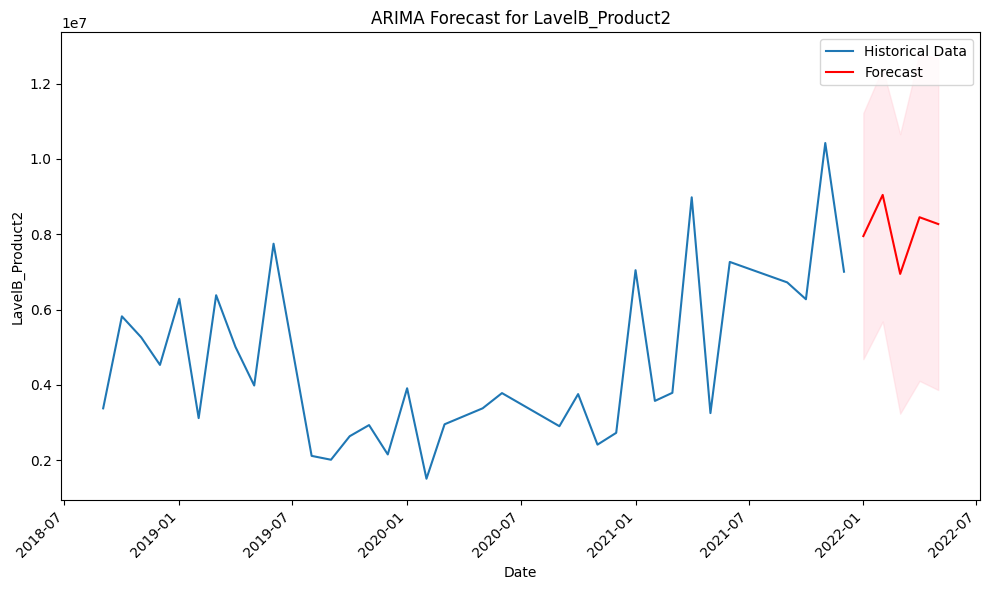

Forecasted values for LavelB_Product2:
2022-01-01: 7951932.85
2022-02-01: 9044676.48
2022-03-01: 6948152.86
2022-04-01: 8452209.39
2022-05-01: 8271257.65


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

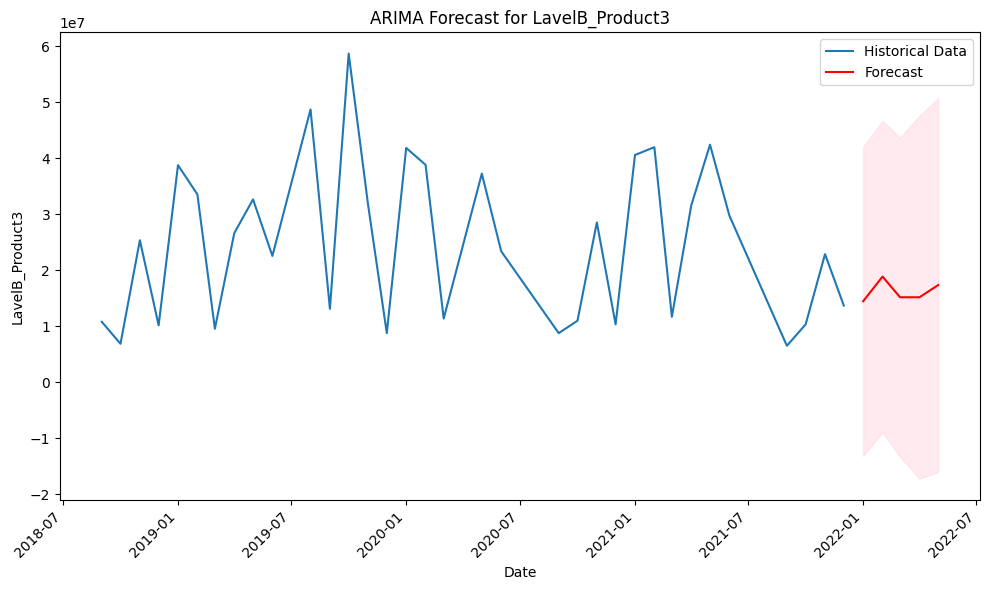

Forecasted values for LavelB_Product3:
2022-01-01: 14438290.23
2022-02-01: 18839872.11
2022-03-01: 15146959.60
2022-04-01: 15144983.13
2022-05-01: 17326312.39


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

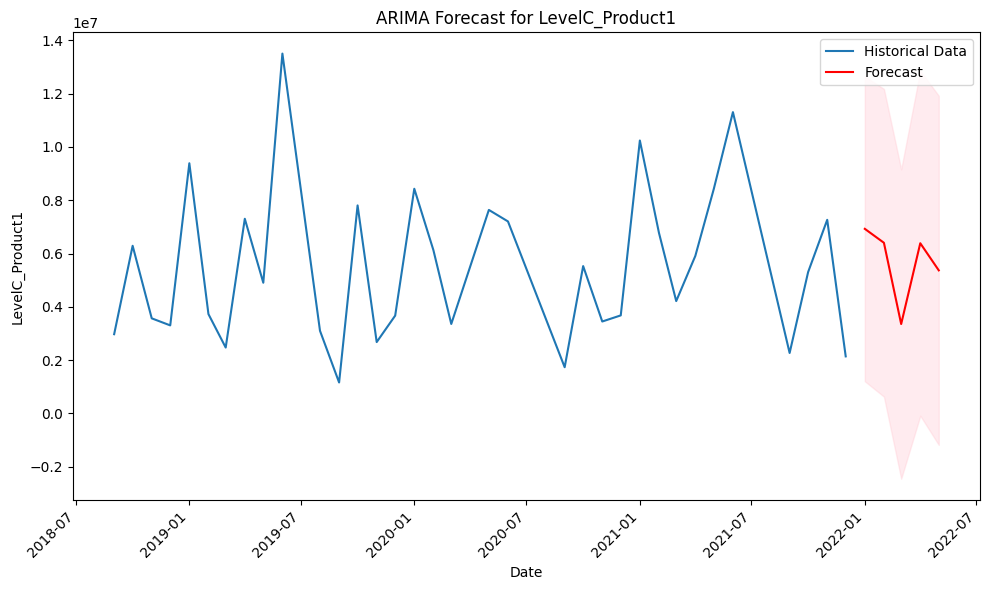

Forecasted values for LevelC_Product1:
2022-01-01: 6926153.29
2022-02-01: 6403009.30
2022-03-01: 3353937.79
2022-04-01: 6386356.08
2022-05-01: 5368205.09


In [30]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered data
filtered_df = pd.read_csv('filtered_file.csv')
filtered_df['keys'] = pd.to_datetime(filtered_df['keys'], format='%m-%d-%Y')
filtered_df.set_index('keys', inplace=True)

# Future dates to forecast
future_dates = pd.to_datetime(['01-01-2022', '02-01-2022', '03-01-2022', '04-01-2022', '05-01-2022'], format='%m-%d-%Y')

# Iterate through each product
for product in products:
    try:
        # Prepare data for the current product
        product_data = filtered_df[product].dropna()

        # Fit ARIMA model (you might need to tune the order (p, d, q))
        model = ARIMA(product_data, order=(5, 1, 0))
        model_fit = model.fit()

        # Forecast future values
        forecast = model_fit.get_forecast(steps=len(future_dates))
        predicted_values = forecast.predicted_mean
        confidence_intervals = forecast.conf_int()

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(product_data, label='Historical Data')
        plt.plot(future_dates, predicted_values, label='Forecast', color='red')
        plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
        plt.xlabel('Date')
        plt.ylabel(product)
        plt.title(f'ARIMA Forecast for {product}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print the forecasted values
        print(f"Forecasted values for {product}:")
        for date, value in zip(future_dates, predicted_values):
            print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

    except Exception as e:
        print(f"Error forecasting {product}: {e}")


STL-ARIMA model for all products

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

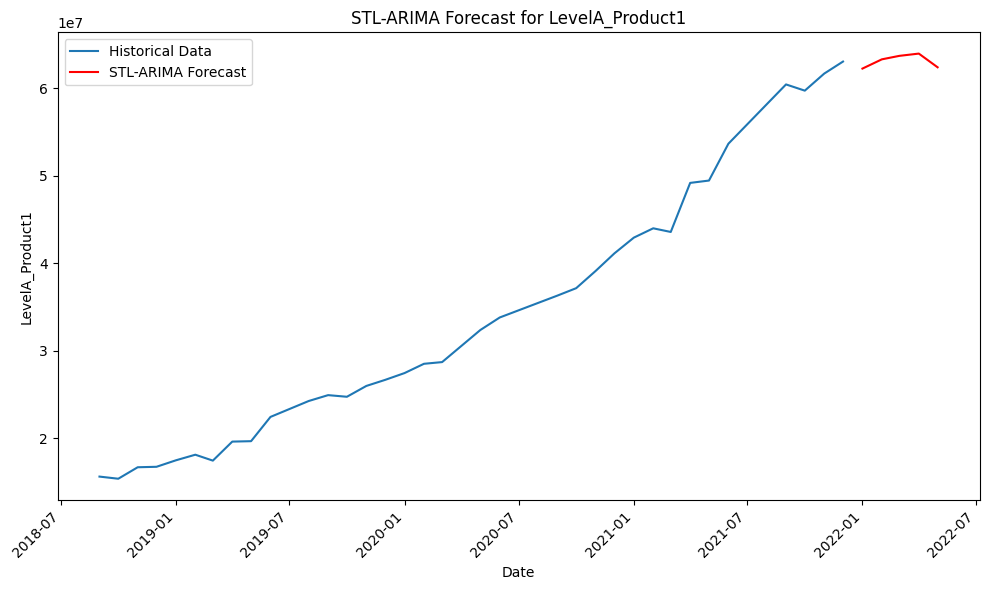

Forecasted values for LevelA_Product1:
2022-01-01: 62241686.41
2022-02-01: 63298717.23
2022-03-01: 63697550.38
2022-04-01: 63955632.93
2022-05-01: 62390291.09


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

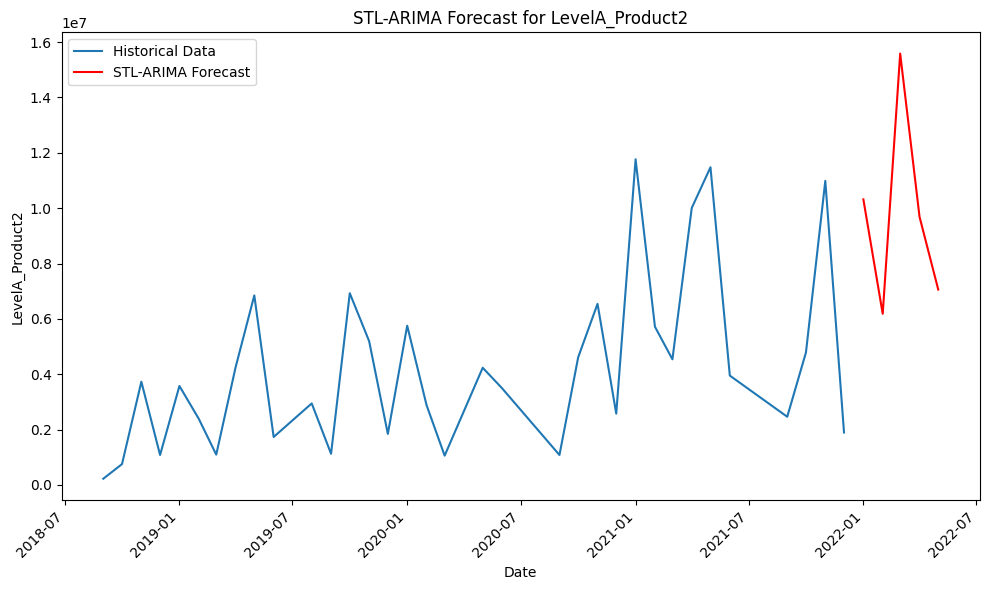

Forecasted values for LevelA_Product2:
2022-01-01: 10317313.77
2022-02-01: 6182880.86
2022-03-01: 15586210.85
2022-04-01: 9688497.54
2022-05-01: 7057613.46


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

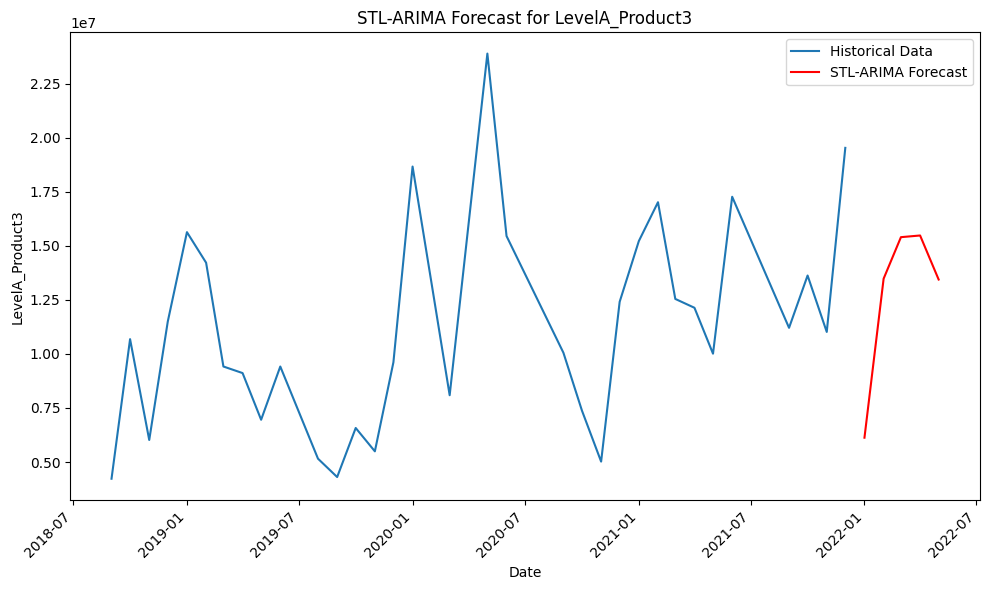

Forecasted values for LevelA_Product3:
2022-01-01: 6124513.21
2022-02-01: 13477583.53
2022-03-01: 15396254.10
2022-04-01: 15473956.23
2022-05-01: 13437618.45


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

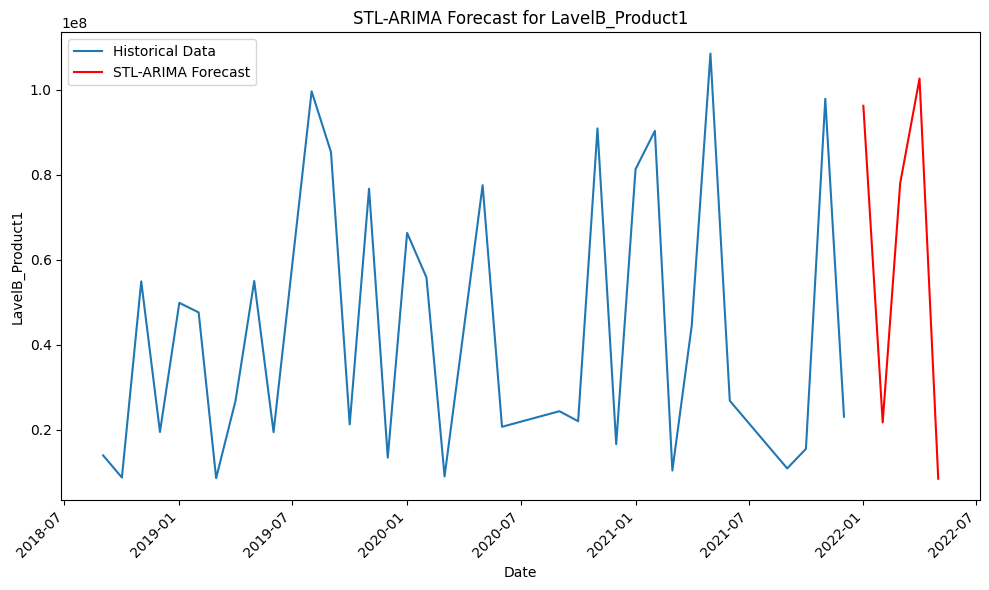

Forecasted values for LavelB_Product1:
2022-01-01: 96221825.08
2022-02-01: 21682519.68
2022-03-01: 77963755.91
2022-04-01: 102638835.60
2022-05-01: 8434897.93


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/di

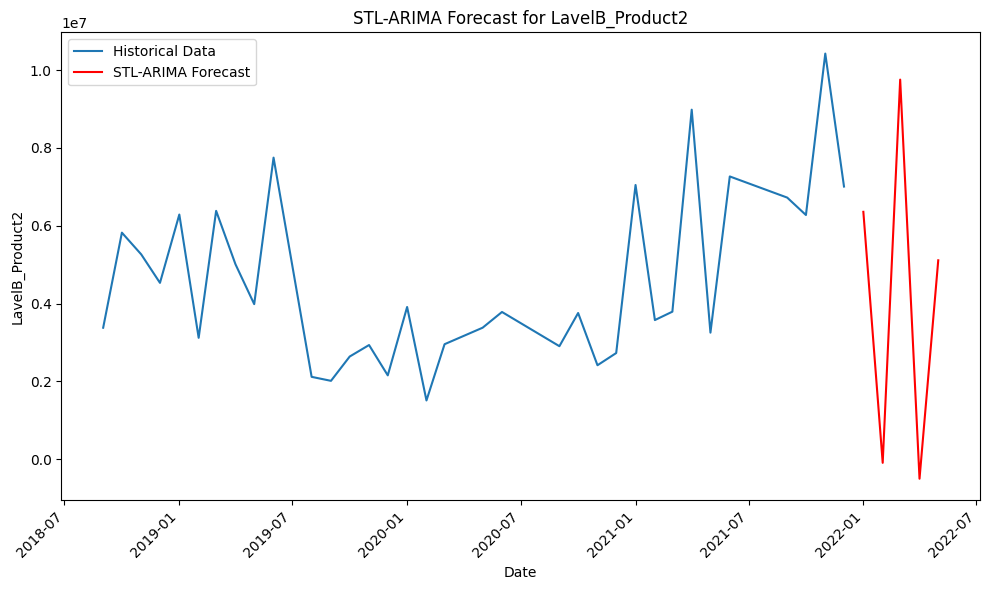

Forecasted values for LavelB_Product2:
2022-01-01: 6357099.60
2022-02-01: -90400.56
2022-03-01: 9753392.08
2022-04-01: -498815.12
2022-05-01: 5112122.02


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

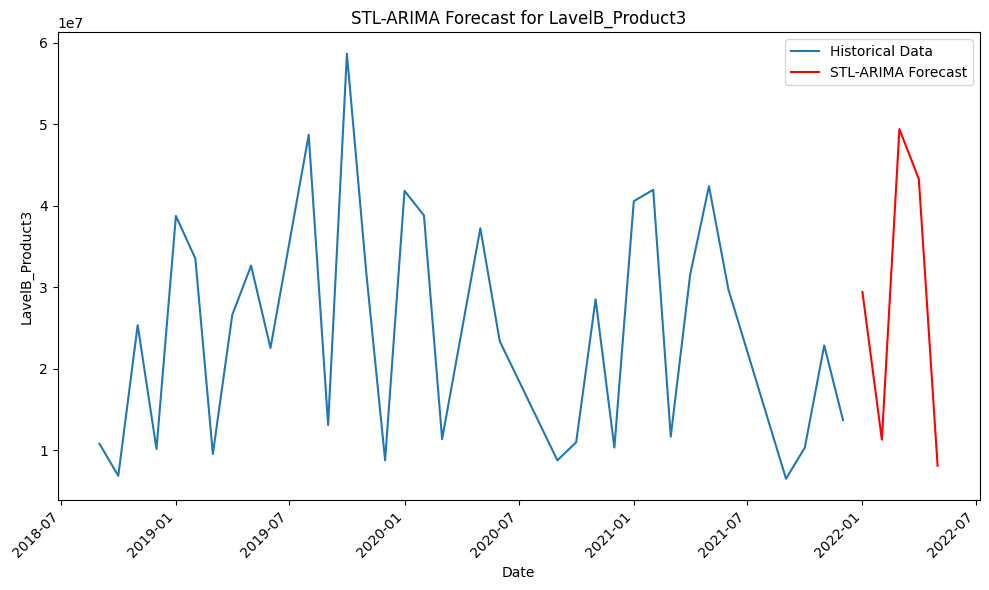

Forecasted values for LavelB_Product3:
2022-01-01: 29392060.24
2022-02-01: 11278029.52
2022-03-01: 49394973.76
2022-04-01: 43270049.39
2022-05-01: 8067653.80


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

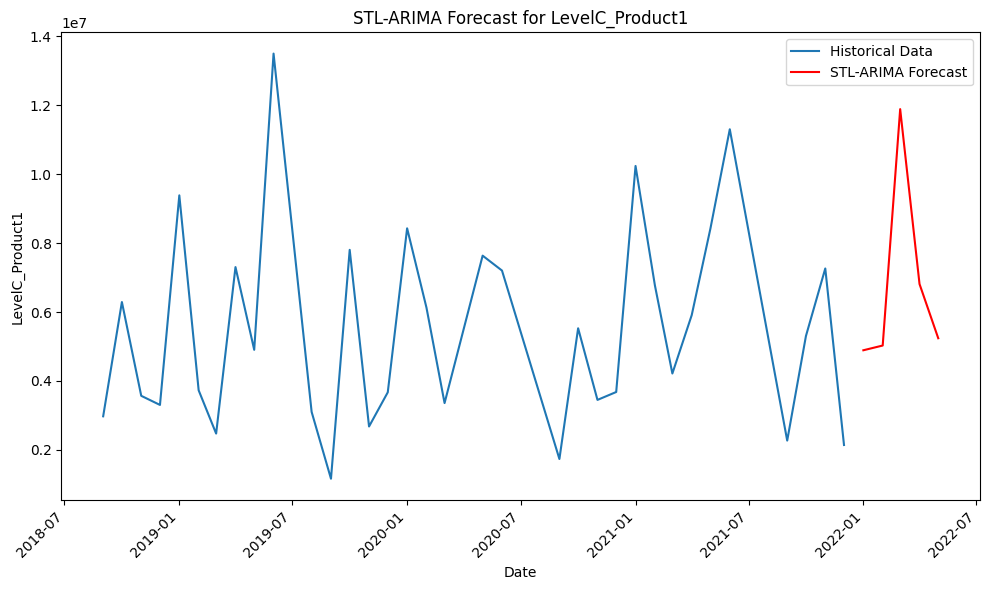

Forecasted values for LevelC_Product1:
2022-01-01: 4889931.49
2022-02-01: 5027635.70
2022-03-01: 11890245.82
2022-04-01: 6812884.47
2022-05-01: 5238968.14


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the filtered data
filtered_df = pd.read_csv('filtered_file.csv')
filtered_df['keys'] = pd.to_datetime(filtered_df['keys'], format='%m-%d-%Y')
filtered_df.set_index('keys', inplace=True)

# Future dates to forecast
future_dates = pd.to_datetime(['01-01-2022', '02-01-2022', '03-01-2022', '04-01-2022', '05-01-2022'], format='%m-%d-%Y')

# Iterate through each product
for product in products:
    try:
        # Prepare data for the current product
        product_data = filtered_df[product].dropna()

        # Decompose the time series using STL
        stl = STL(product_data, period=12)  # Adjust period based on your data's seasonality
        res = stl.fit()

        # Fit ARIMA model to the seasonally adjusted data
        model = ARIMA(res.trend, order=(5, 1, 0))  # Tune the order (p, d, q) as needed
        model_fit = model.fit()

        # Forecast future trend values
        forecast_trend = model_fit.get_forecast(steps=len(future_dates)).predicted_mean

        # Add seasonal component back to the forecast
        forecast_seasonal = res.seasonal[-12:].values  # Extract last 12 months of seasonal component
        predicted_values = forecast_trend + forecast_seasonal[:len(future_dates)]

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(product_data, label='Historical Data')
        plt.plot(future_dates, predicted_values, label='STL-ARIMA Forecast', color='red')
        plt.xlabel('Date')
        plt.ylabel(product)
        plt.title(f'STL-ARIMA Forecast for {product}')
        plt.xticks(rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print the forecasted values
        print(f"Forecasted values for {product}:")
        for date, value in zip(future_dates, predicted_values):
            print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

    except Exception as e:
        print(f"Error forecasting {product}: {e}")


Linear regression for all products

Forecast for LevelA_Product1:
2022-01-01: 58881843.20
2022-02-01: 60334459.25
2022-03-01: 61787075.30
2022-04-01: 63239691.36
2022-05-01: 64692307.41

Forecast for LevelA_Product2:
2022-01-01: 6867283.66
2022-02-01: 7018516.27
2022-03-01: 7169748.88
2022-04-01: 7320981.48
2022-05-01: 7472214.09

Forecast for LevelA_Product3:
2022-01-01: 14532263.82
2022-02-01: 14720682.86
2022-03-01: 14909101.90
2022-04-01: 15097520.94
2022-05-01: 15285939.98

Forecast for LavelB_Product1:
2022-01-01: 52264268.55
2022-02-01: 52742603.53
2022-03-01: 53220938.50
2022-04-01: 53699273.48
2022-05-01: 54177608.46

Forecast for LavelB_Product2:
2022-01-01: 5691170.71
2022-02-01: 5755711.51
2022-03-01: 5820252.32
2022-04-01: 5884793.12
2022-05-01: 5949333.93

Forecast for LavelB_Product3:
2022-01-01: 24044486.45
2022-02-01: 24007271.85
2022-03-01: 23970057.25
2022-04-01: 23932842.65
2022-05-01: 23895628.05

Forecast for LevelC_Product1:
2022-01-01: 6018197.85
2022-02-01: 6048085.19
2022-03-01: 6077972.52
2022-

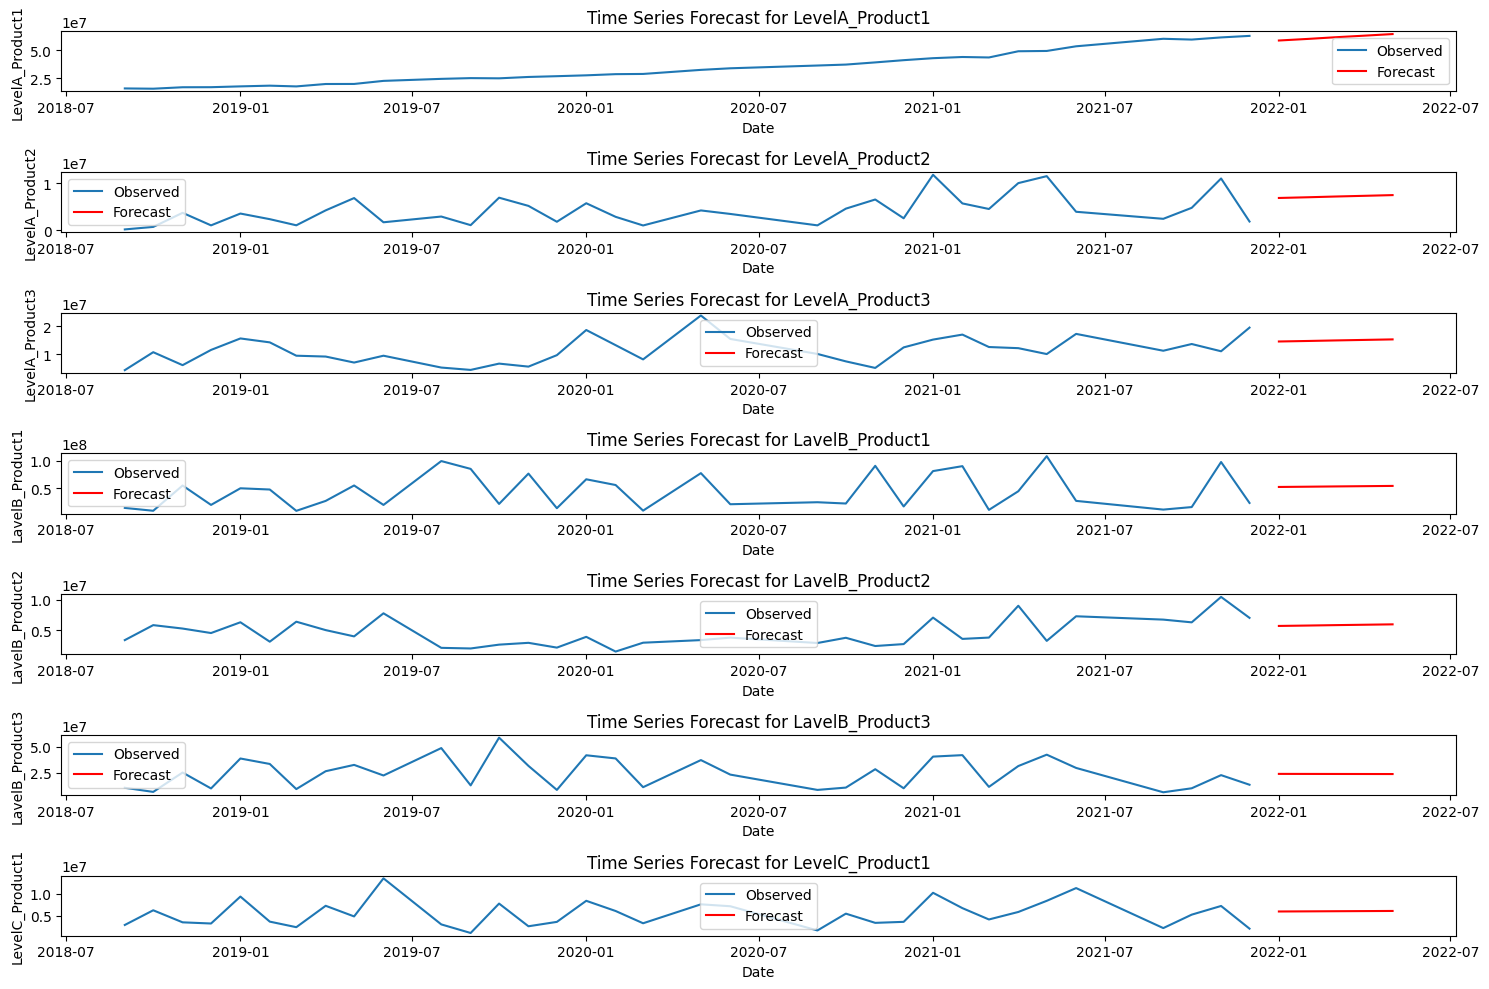

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load and preprocess the data
file_path = '/content/filtered_file.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'keys' to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# List of product columns
product_columns = data.columns

# Dictionary to store forecast results
forecasts = {}

# Function to apply linear regression and forecast
def linear_regression_forecast(data, product, steps=5):
    # Prepare the data for linear regression
    X = np.arange(len(data)).reshape(-1, 1)
    y = data[product].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Forecast the next `steps` values
    X_forecast = np.arange(len(data), len(data) + steps).reshape(-1, 1)
    forecast = model.predict(X_forecast)

    # Generate future dates for the forecast
    last_date = data.index[-1]
    forecast_index = pd.date_range(start=last_date, periods=steps + 1, freq='MS')[1:]  # Use 'MS' for month start frequency

    # Create a forecast series
    forecast_series = pd.Series(forecast, index=forecast_index)

    return forecast_series

# Apply linear regression model to each product
for product in product_columns:
    forecasts[product] = linear_regression_forecast(data, product)

# Print forecasted values for the specified dates
forecast_dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
for product, forecast in forecasts.items():
    print(f"Forecast for {product}:")
    for date in forecast_dates:
        if pd.to_datetime(date) in forecast.index:
            print(f"{date}: {forecast[pd.to_datetime(date)]:.2f}")
    print()

# Plot the original data and the forecasted values for each product
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(len(product_columns), 1, i)
    plt.plot(data[product], label='Observed')
    plt.plot(forecasts[product], label='Forecast', color='red')
    plt.title(f'Time Series Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.legend()
plt.tight_layout()
plt.show()


Ramdom Forest model for all products

Forecast for LevelA_Product1:
2022-01-01: 48594793.33
2022-02-01: 48594793.33
2022-03-01: 48594793.33
2022-04-01: 48594793.33
2022-05-01: 48594793.33

Forecast for LevelA_Product2:
2022-01-01: 3866819.82
2022-02-01: 5879552.79
2022-03-01: 8277142.89
2022-04-01: 7321617.97
2022-05-01: 7200251.05

Forecast for LevelA_Product3:
2022-01-01: 9936257.11
2022-02-01: 12015934.74
2022-03-01: 10593879.13
2022-04-01: 15004813.55
2022-05-01: 16069515.87

Forecast for LavelB_Product1:
2022-01-01: 40763641.68
2022-02-01: 56334519.07
2022-03-01: 77500186.31
2022-04-01: 50200440.38
2022-05-01: 40287950.53

Forecast for LavelB_Product2:
2022-01-01: 4720594.01
2022-02-01: 4678624.32
2022-03-01: 3079265.67
2022-04-01: 4435372.95
2022-05-01: 3028899.93

Forecast for LavelB_Product3:
2022-01-01: 22206563.93
2022-02-01: 32732038.69
2022-03-01: 29873073.31
2022-04-01: 24927613.18
2022-05-01: 16536706.76

Forecast for LevelC_Product1:
2022-01-01: 4952542.52
2022-02-01: 6449849.93
2022-03-01: 5698207.27
2022-0

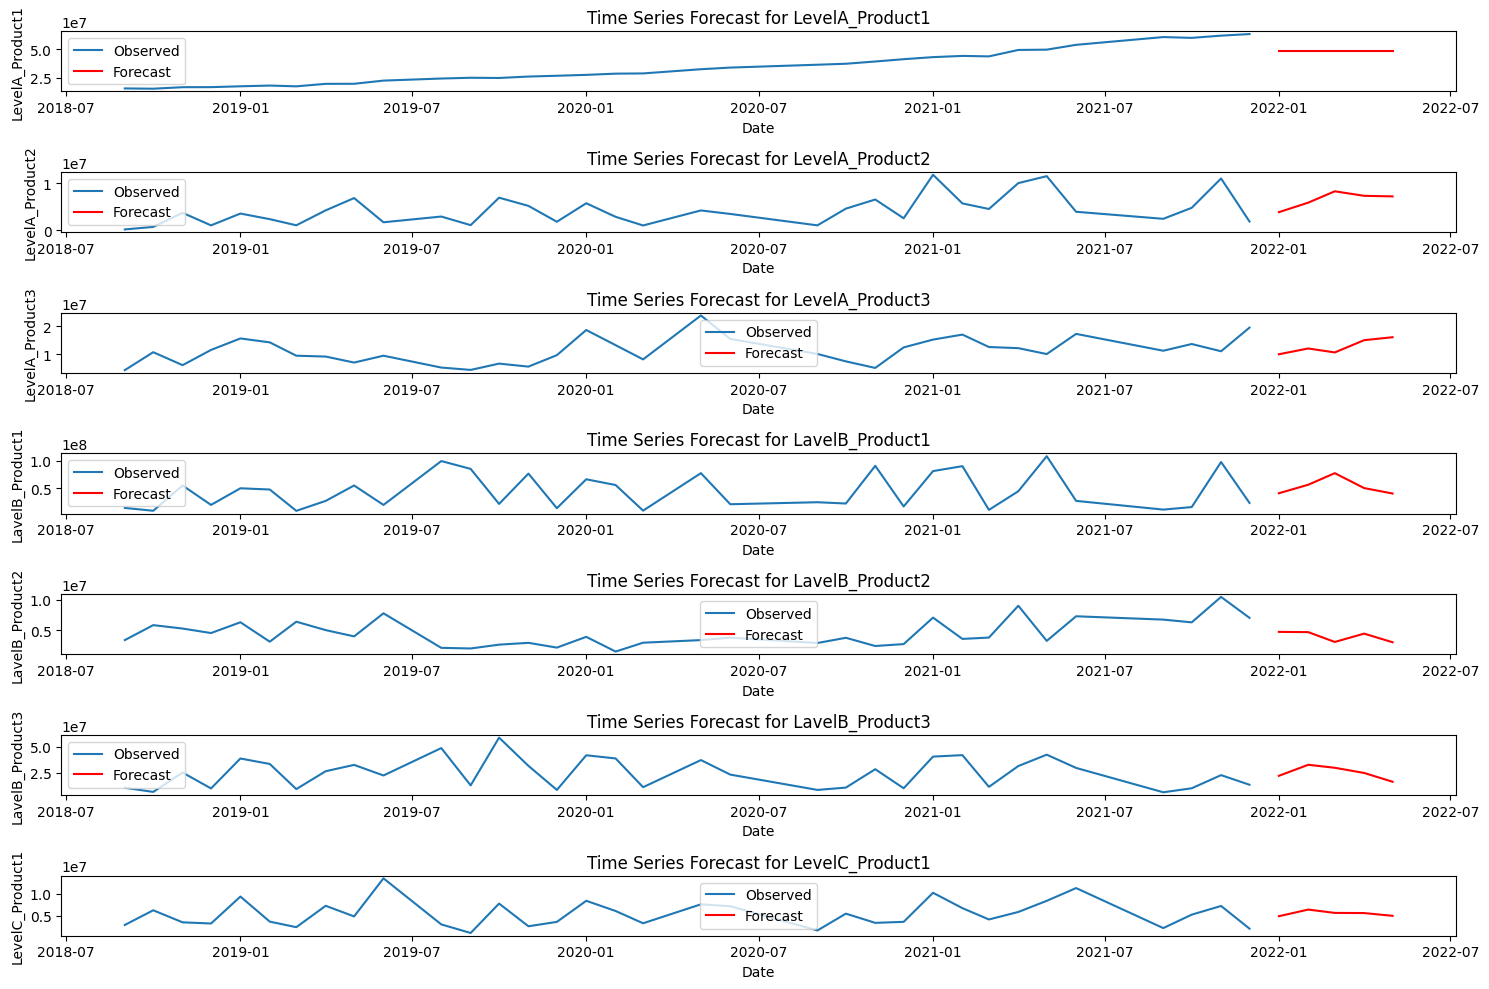

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess the data
file_path = '/content/filtered_file.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'keys' to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# List of product columns
product_columns = data.columns

# Dictionary to store forecast results
forecasts = {}

# Function to transform time series data into supervised learning format
def create_lagged_features(series, lag=1):
    df = pd.DataFrame(series)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.columns = ['lag_' + str(i) for i in range(lag, 0, -1)] + ['y']
    df.dropna(inplace=True)
    return df

# Function to apply Random Forest and forecast
def random_forest_forecast(data, product, steps=5, lag=12):
    # Prepare the data with lagged features
    df = create_lagged_features(data[product], lag)

    # Split the data into training and test sets
    X = df.drop('y', axis=1)
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Forecast the next `steps` values
    forecast = []
    last_observations = X_test_scaled[-1]
    for _ in range(steps):
        next_value = model.predict(last_observations.reshape(1, -1))
        forecast.append(next_value[0])
        last_observations = np.append(last_observations[1:], next_value)

    # Generate future dates for the forecast
    last_date = data.index[-1]
    forecast_index = pd.date_range(start=last_date, periods=steps + 1, freq='MS')[1:]

    # Create a forecast series
    forecast_series = pd.Series(forecast, index=forecast_index)

    return forecast_series

# Apply Random Forest model to each product
for product in product_columns:
    forecasts[product] = random_forest_forecast(data, product)

# Print forecasted values for the specified dates
forecast_dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
for product, forecast in forecasts.items():
    print(f"Forecast for {product}:")
    for date in forecast_dates:
        if pd.to_datetime(date) in forecast.index:
            print(f"{date}: {forecast[pd.to_datetime(date)]:.2f}")
    print()

# Plot the original data and the forecasted values for each product
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(len(product_columns), 1, i)
    plt.plot(data[product], label='Observed')
    plt.plot(forecasts[product], label='Forecast', color='red')
    plt.title(f'Time Series Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.legend()
plt.tight_layout()
plt.show()


SVM model for all products

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

Forecast for LevelA_Product1:
2022-01-01    36294148.82
2022-02-01    36294156.99
2022-03-01    36294178.19
2022-04-01    36294217.09
2022-05-01    36294248.21
dtype: object

Forecast for LevelA_Product2:
2022-01-01    4612026.77
2022-02-01    4612019.10
2022-03-01    4612029.39
2022-04-01    4612030.47
2022-05-01    4612015.42
dtype: object

Forecast for LevelA_Product3:
2022-01-01    12131528.44
2022-02-01    12131528.45
2022-03-01    12131528.45
2022-04-01    12131528.45
2022-05-01    12131528.45
dtype: object

Forecast for LavelB_Product1:
2022-01-01    44436309.41
2022-02-01    44436309.41
2022-03-01    44436309.41
2022-04-01    44436309.41
2022-05-01    44436309.41
dtype: object

Forecast for LavelB_Product2:
2022-01-01    3253596.64
2022-02-01    3253535.11
2022-03-01    3253560.81
2022-04-01    3253598.98
2022-05-01    3253567.73
dtype: object

Forecast for LavelB_Product3:
2022-01-01    31539446.51
2022-02-01    31539435.47
2022-03-01    31539457.89
2022-04-01    31539495.64
2

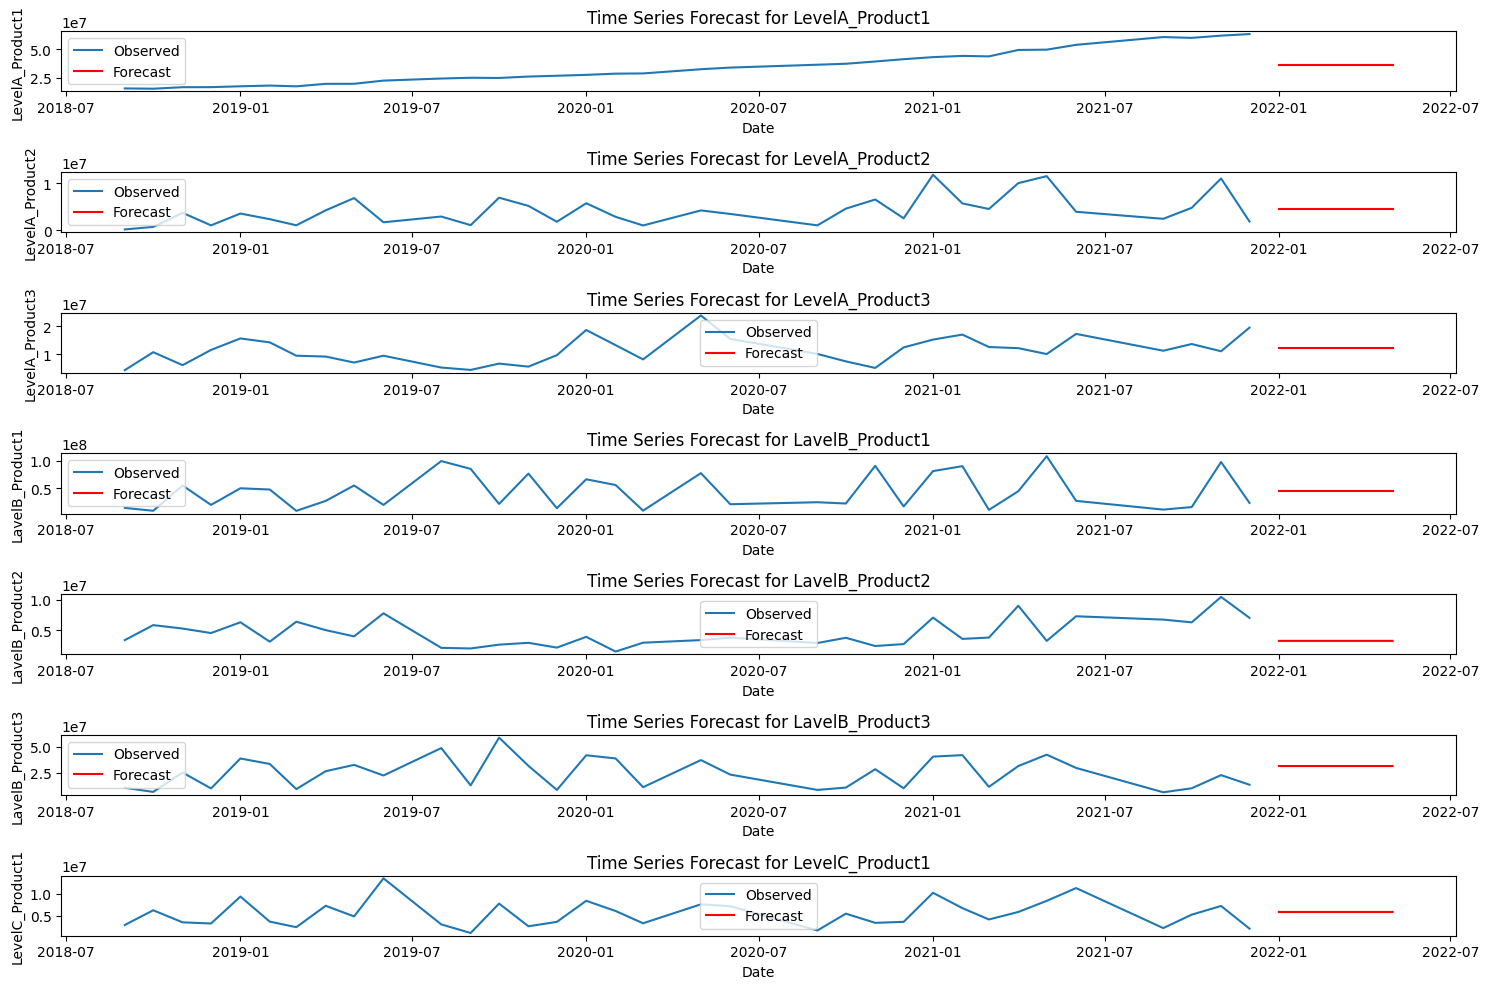

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

# Load and preprocess the data
file_path = '/content/filtered_file.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'keys' to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# List of product columns
product_columns = data.columns

# Dictionary to store forecast results
forecasts = {}

# Function to transform time series data into supervised learning format
def create_lagged_features(series, lag=1):
    df = pd.DataFrame(series)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.columns = ['lag_' + str(i) for i in range(lag, 0, -1)] + ['y']
    df.dropna(inplace=True)
    return df

# Function to apply SVM regression and forecast with hyperparameter tuning
def svm_forecast(data, product, forecast_dates, lag=12):
    # Prepare the data with lagged features
    df = create_lagged_features(data[product], lag)

    # Split the data into features and target
    X = df.drop('y', axis=1)
    y = df['y']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'svr__C': [0.1, 1, 10, 100],
        'svr__gamma': [0.01, 0.1, 1],
        'svr__kernel': ['rbf']
    }

    # Create a pipeline with StandardScaler and SVR
    pipeline = make_pipeline(StandardScaler(), SVR())

    # Perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Forecast for specific dates
    forecast = []
    last_observations = X.iloc[-1].values

    # Forecast for the length of forecast_dates
    for _ in range(len(forecast_dates)):
        next_value = best_model.predict(last_observations.reshape(1, -1))
        forecast.append(next_value[0])
        last_observations = np.append(last_observations[1:], next_value)

    # Create a forecast series
    forecast_series = pd.Series(forecast, index=forecast_dates)

    return forecast_series

# Define specific dates to forecast
forecast_dates = pd.to_datetime(["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01"])

# Apply SVM regression model to each product
for product in product_columns:
    forecasts[product] = svm_forecast(data, product, forecast_dates)

# Print forecasted values
for product, forecast in forecasts.items():
    print(f"Forecast for {product}:")
    formatted_forecast = forecast.apply(lambda x: f'{x:.2f}')
    print(formatted_forecast)
    print()

# Plot the original data and the forecasted values for each product
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(len(product_columns), 1, i)
    plt.plot(data[product], label='Observed')
    plt.plot(forecasts[product], label='Forecast', color='red')
    plt.title(f'Time Series Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.legend()
plt.tight_layout()
plt.show()


XGBoost model for every model

Forecast for LevelA_Product1:
2022-01-01    49444076.00
2022-02-01    49444076.00
2022-03-01    49444076.00
2022-04-01    49444076.00
2022-05-01    49444076.00
dtype: object

Forecast for LevelA_Product2:
2022-01-01    2493575.50
2022-02-01    3386591.25
2022-03-01    4864134.50
2022-04-01    9709465.00
2022-05-01    9963781.00
dtype: object

Forecast for LevelA_Product3:
2022-01-01     9084831.00
2022-02-01    13805650.00
2022-03-01     9394346.00
2022-04-01    15447484.00
2022-05-01    13775874.00
dtype: object

Forecast for LavelB_Product1:
2022-01-01    42711828.00
2022-02-01    65975456.00
2022-03-01    83983064.00
2022-04-01    52270380.00
2022-05-01    10534396.00
dtype: object

Forecast for LavelB_Product2:
2022-01-01    3353789.00
2022-02-01    3167121.25
2022-03-01    2947760.25
2022-04-01    3112345.75
2022-05-01    3558797.25
dtype: object

Forecast for LavelB_Product3:
2022-01-01     9861706.00
2022-02-01    32681906.00
2022-03-01    40587464.00
2022-04-01    38748876.00
2

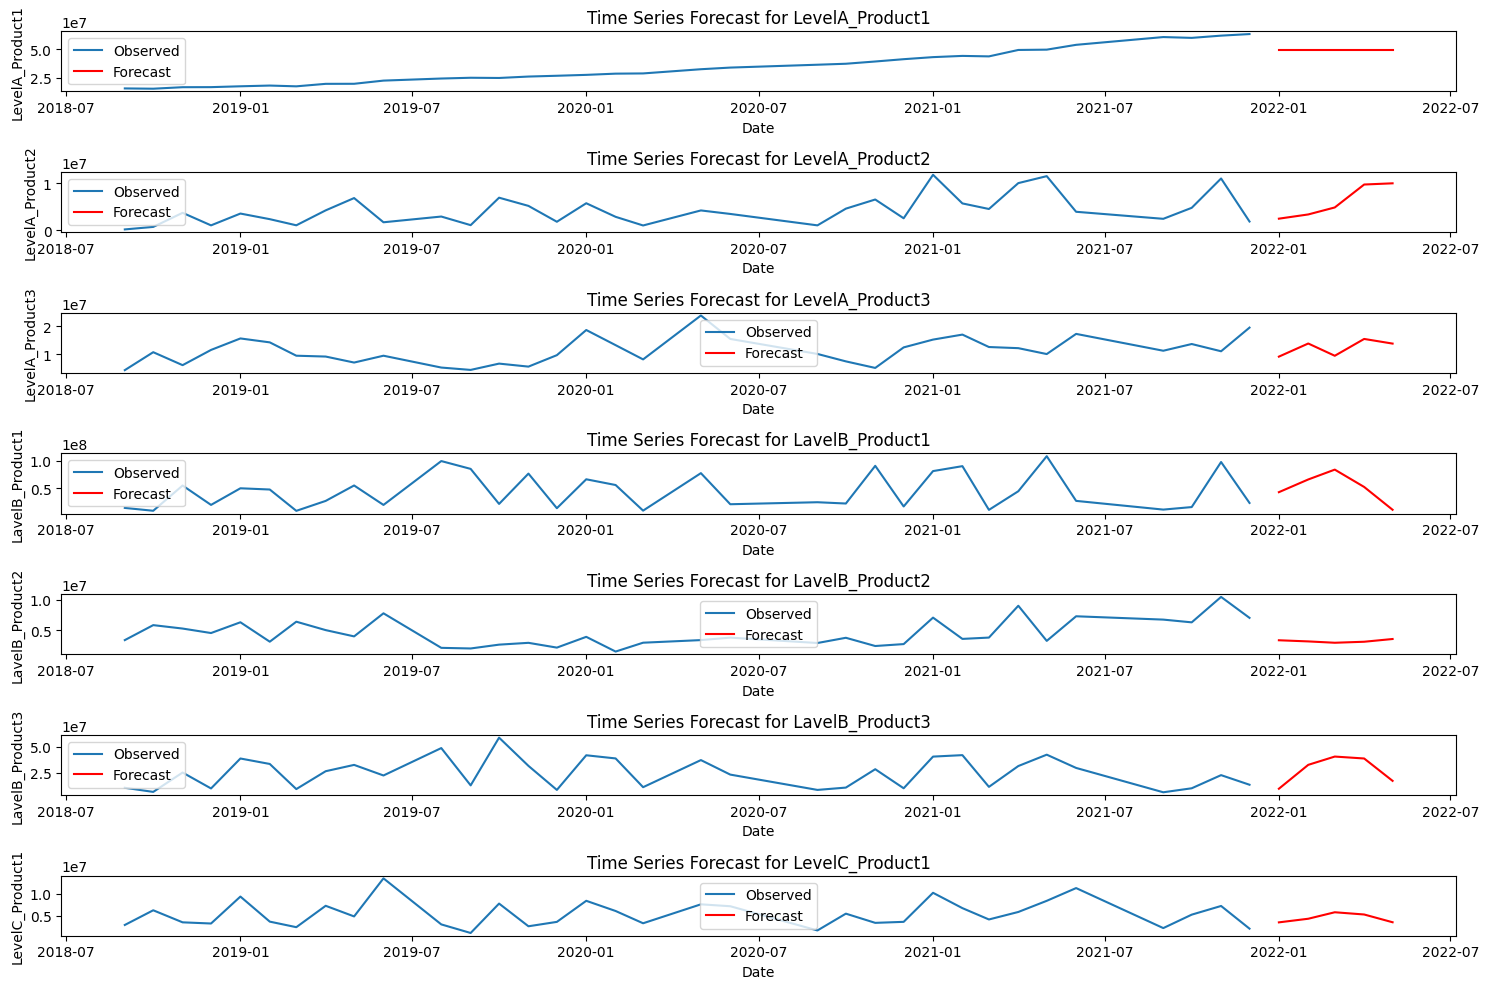

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load and preprocess the data
file_path = '/content/filtered_file.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Convert 'keys' to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# List of product columns
product_columns = data.columns

# Dictionary to store forecast results
forecasts = {}

# Function to transform time series data into supervised learning format
def create_lagged_features(series, lag=1):
    df = pd.DataFrame(series)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.columns = ['lag_' + str(i) for i in range(lag, 0, -1)] + ['y']
    df.dropna(inplace=True)
    return df

# Function to apply XGBoost and forecast
def xgboost_forecast(data, product, forecast_dates, lag=12):
    # Prepare the data with lagged features
    df = create_lagged_features(data[product], lag)

    # Split the data into training and test sets
    X = df.drop('y', axis=1)
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Fit the XGBoost model
    model = XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # Forecast for specific dates
    forecast = []
    last_observations = X.iloc[-1].values

    # Forecast for the length of forecast_dates
    for _ in range(len(forecast_dates)):
        next_value = model.predict(last_observations.reshape(1, -1))
        forecast.append(next_value[0])
        last_observations = np.append(last_observations[1:], next_value)

    # Create a forecast series
    forecast_series = pd.Series(forecast, index=forecast_dates)

    return forecast_series

# Define specific dates to forecast
forecast_dates = pd.to_datetime(["2022-01-01", "2022-02-01", "2022-03-01", "2022-04-01", "2022-05-01"])

# Apply XGBoost model to each product
for product in product_columns:
    forecasts[product] = xgboost_forecast(data, product, forecast_dates)

# Print forecasted values
for product, forecast in forecasts.items():
    print(f"Forecast for {product}:")
    formatted_forecast = forecast.apply(lambda x: f'{x:.2f}')
    print(formatted_forecast)
    print()

# Plot the original data and the forecasted values for each product
plt.figure(figsize=(15, 10))
for i, product in enumerate(product_columns, 1):
    plt.subplot(len(product_columns), 1, i)
    plt.plot(data[product], label='Observed')
    plt.plot(forecasts[product], label='Forecast', color='red')
    plt.title(f'Time Series Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel(product)
    plt.legend()
plt.tight_layout()
plt.show()


LSTM model for every product

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2082 - val_loss: 0.2679
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1657 - val_loss: 0.2044
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.1348 - val_loss: 0.1504
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1114 - val_loss: 0.1095
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0837 - val_loss: 0.0897
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0723 - val_loss: 0.0943
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0809 - val_loss: 0.1050
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0743 - val_loss: 0.1080
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0818 - val_loss: 0.1072
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0754 - val_loss: 0.1089
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0702 - val_loss: 0.1112
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0728 - val_

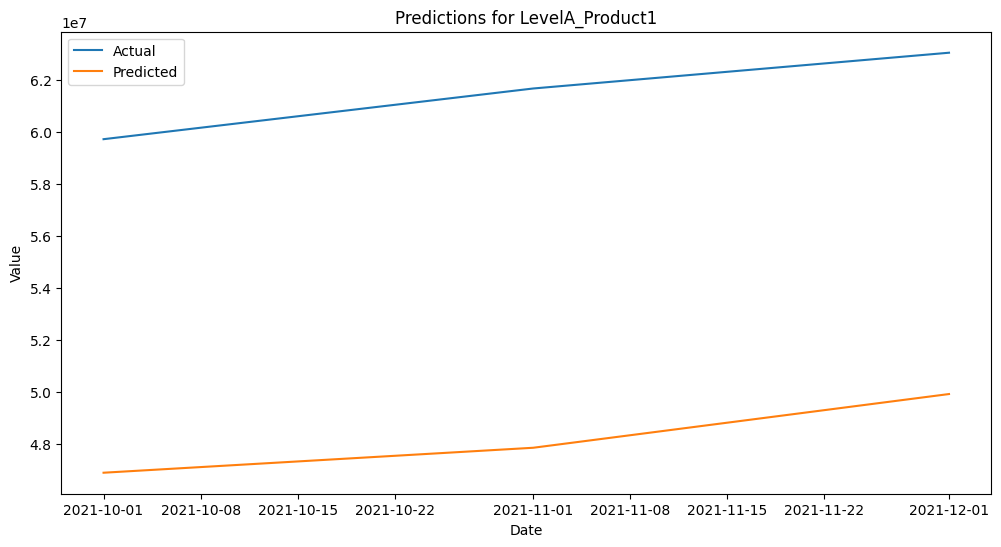

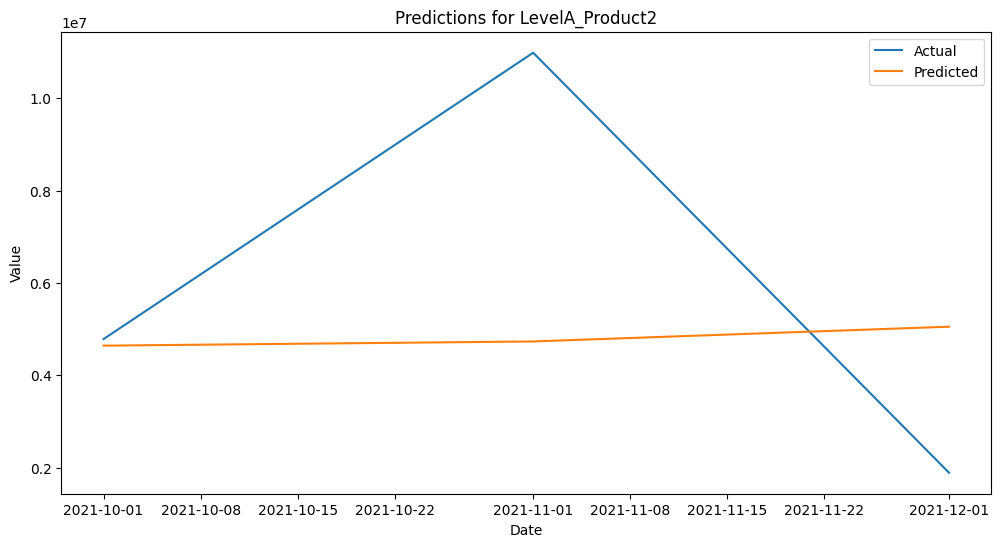

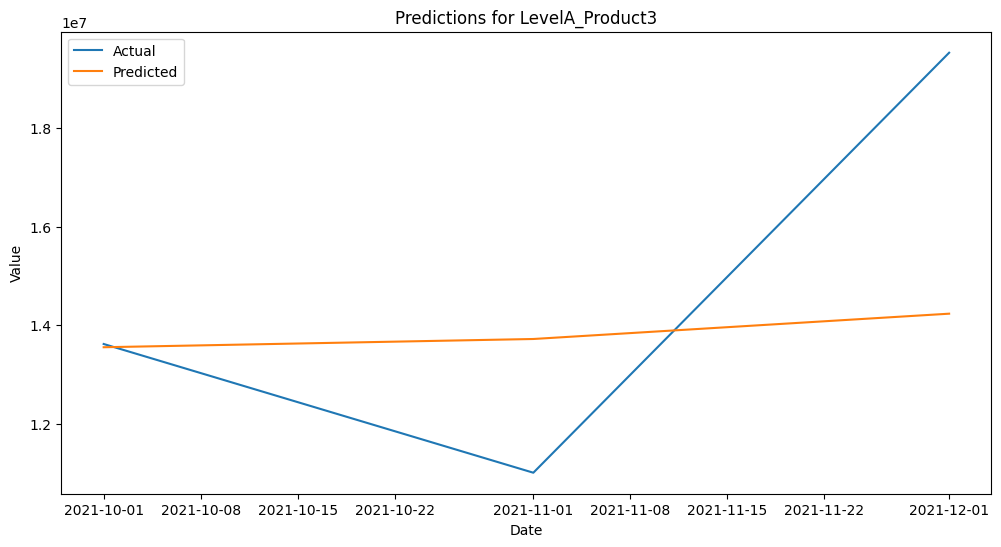

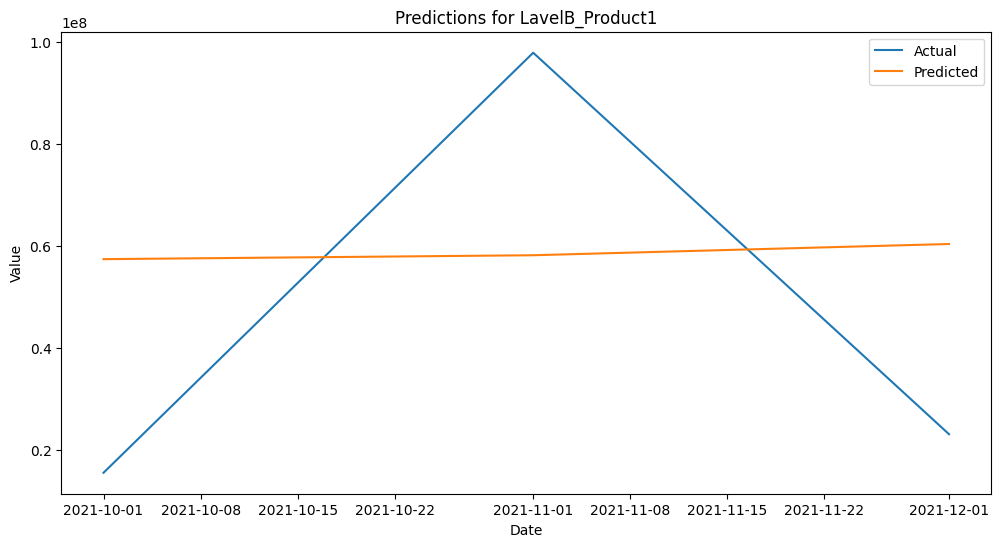

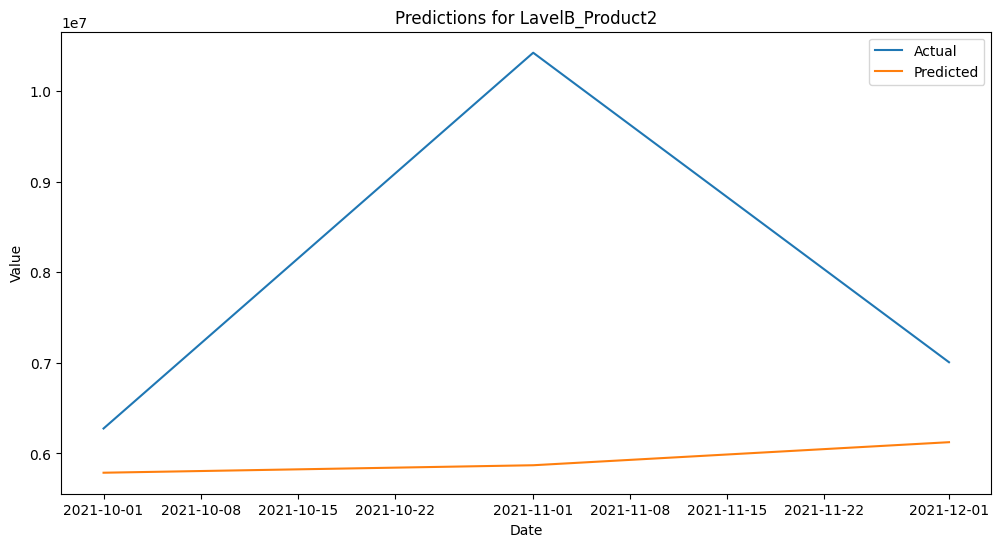

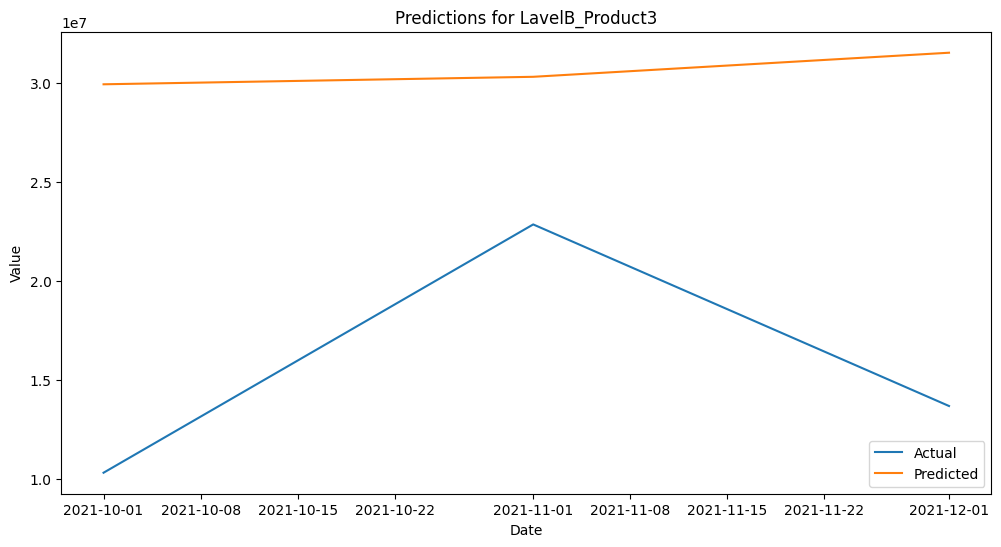

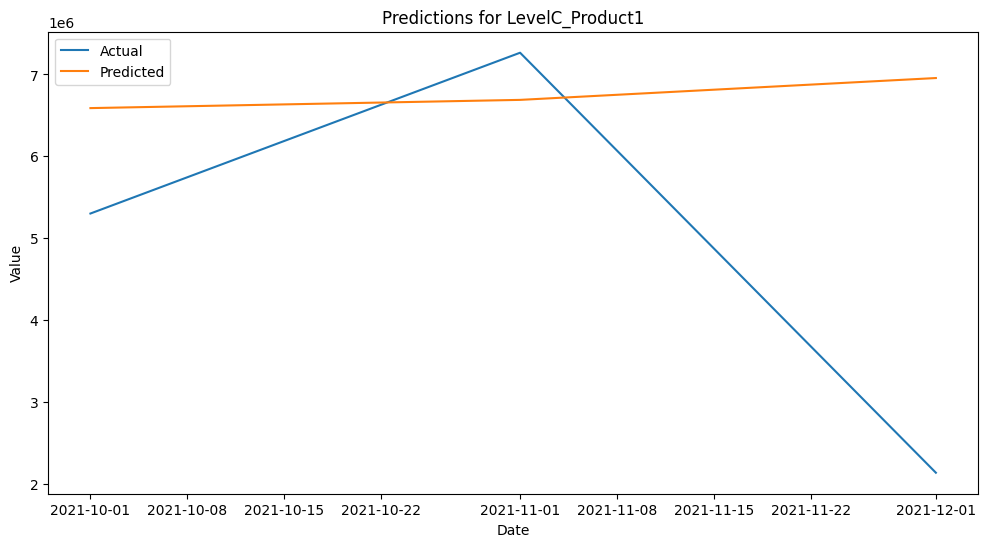

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
            LevelA_Product1  LevelA_Product2  LevelA_Product3  \
2022-01-01      51381331.29       5226103.19      14503480.28   
2022-02-01      52373410.97       5276591.97      14540998.29   
2022-03-01      53611437.29       5446841.30      14862583.23   
2022-04-01      53051391.30       5296359.33      14522412.69   
2022-05-01      53049399.01       5246128.94      14455316.83   

            LavelB_Product1  LavelB_Product2  LavelB_Product3  LevelC_Product1  
2022-01-01      62127644.58       6272746.40      32193906.26       7190911.55  
2022-02-01      63008546.31       6330771.34      32876724.63       7404046.46  
2022-03-01      65081284.31       6489929.67      33655982.63       7604945.58  
2022-04-01      64327560.86       6374417.78      33411790.59       7568574.02  
2022-05-01   

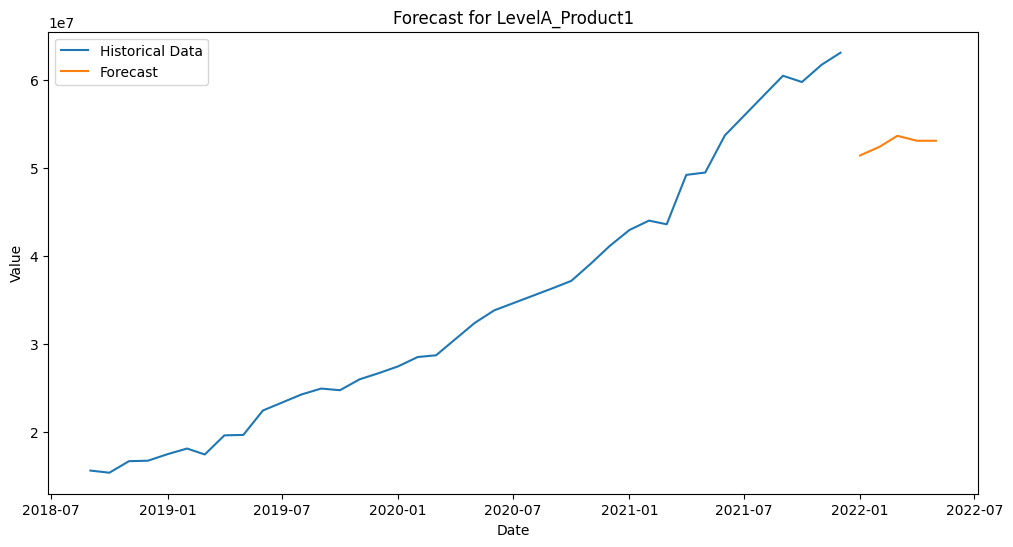

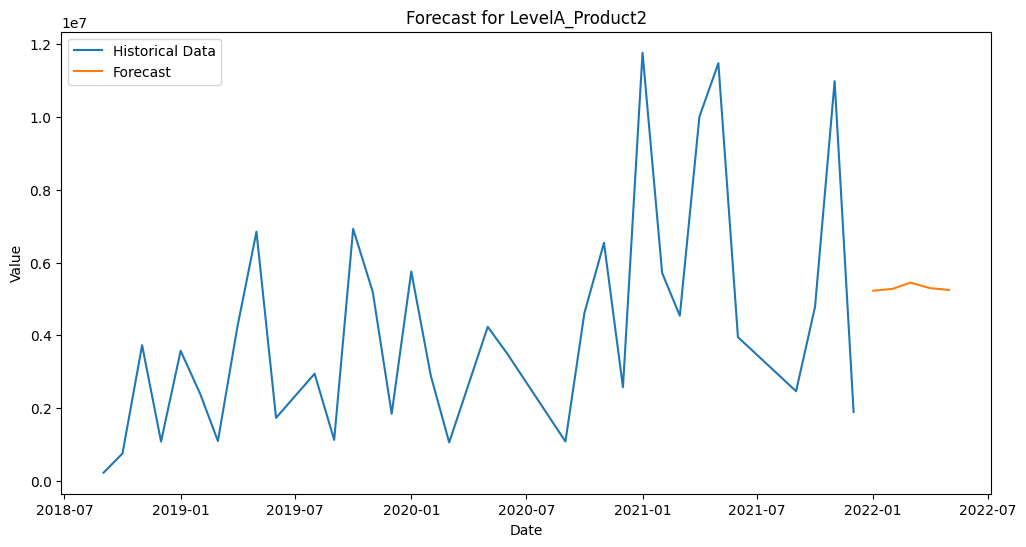

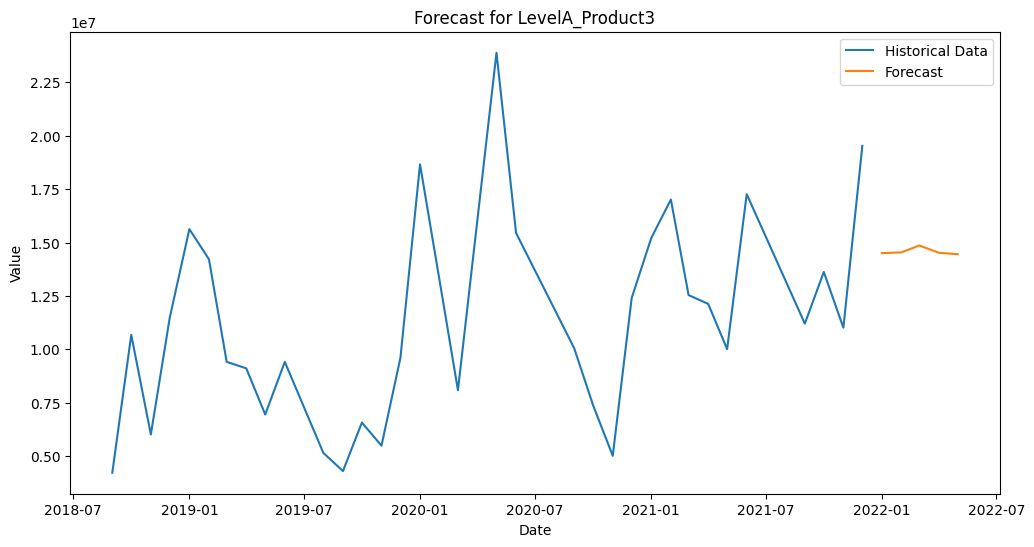

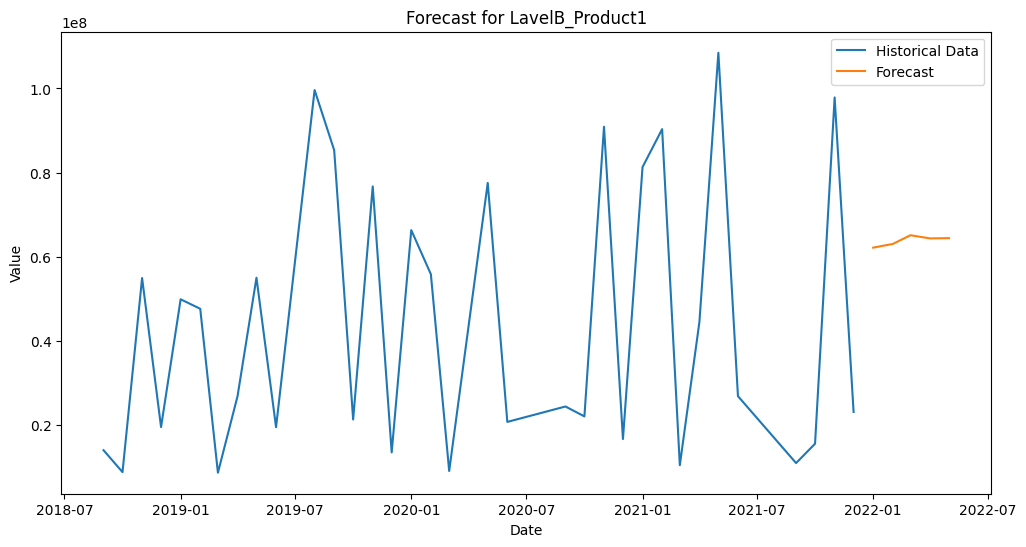

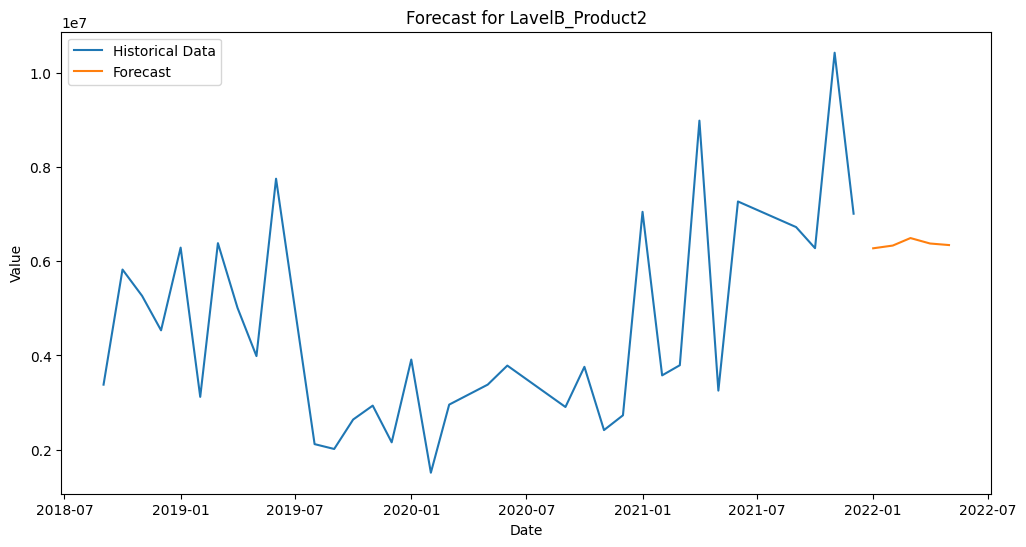

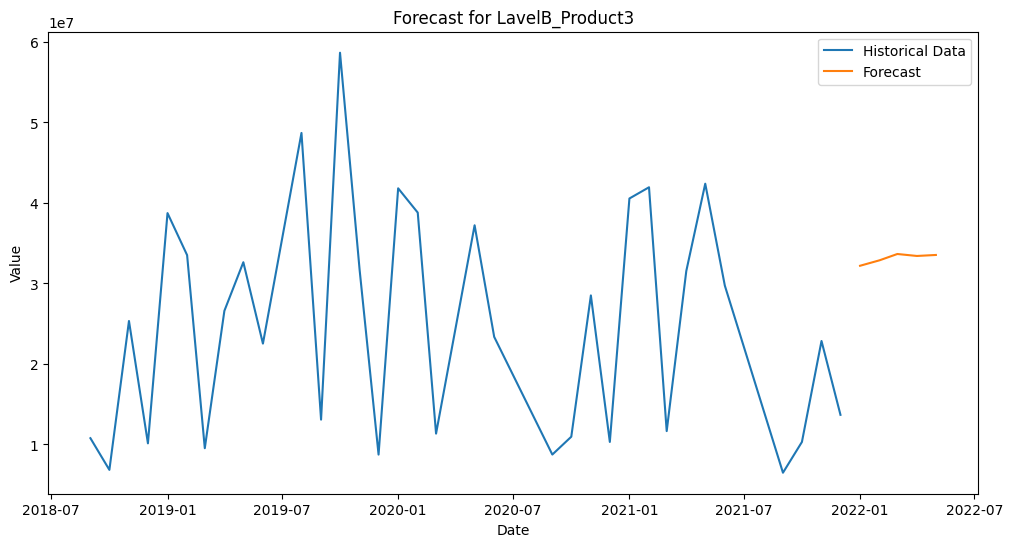

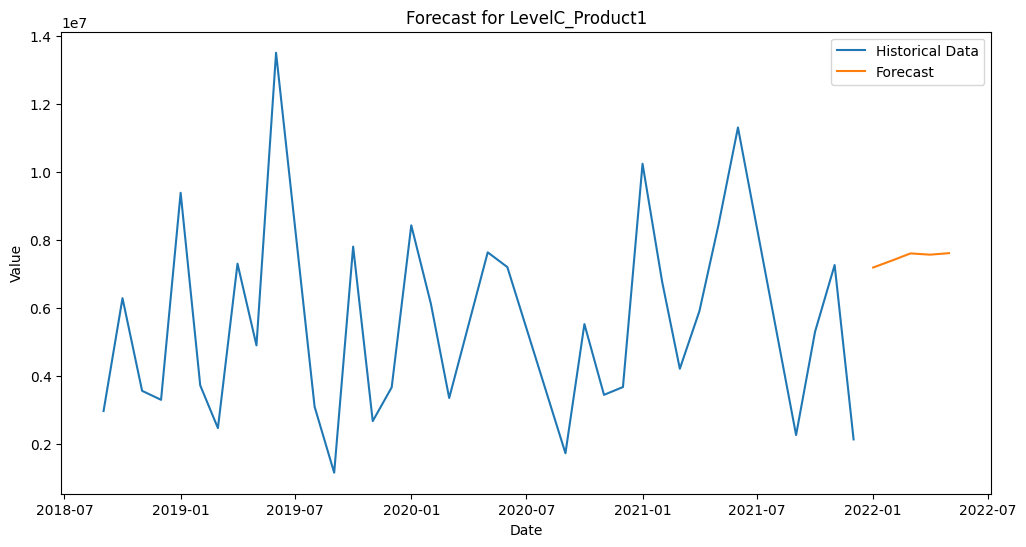

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Load the data
file_path = '/content/filtered_file.csv'
data = pd.read_csv(file_path)

# Convert 'keys' column to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Convert normalized data back to DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Define sequence length
sequence_length = 12  # Using 12 months (1 year) of data for each sequence

# Create sequences
x_data, y_data = create_sequences(data_normalized.values, sequence_length)

# Split data into train and test sets (adjust split ratio if needed)
train_size = int(len(x_data) * 0.9)  # Increased training data
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, data_normalized.shape[1])))  # Increased LSTM units
model.add(Dropout(0.3))  # Increased dropout
model.add(LSTM(100, return_sequences=False))  # Increased LSTM units
model.add(Dropout(0.3))  # Increased dropout
model.add(Dense(data_normalized.shape[1]))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(x_train, y_train, epochs=200, batch_size=32,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stopping])  # Increased epochs, batch size, added early stopping

# Make predictions on the test set
predictions = model.predict(x_test)

# Inverse transform predictions to original scale
predictions_rescaled = scaler.inverse_transform(predictions)

# Visualize the predictions
for i, product in enumerate(data.columns):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test)[:, i], label='Actual')
    plt.plot(data.index[-len(y_test):], predictions_rescaled[:, i], label='Predicted')
    plt.title(f'Predictions for {product}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Forecast the next 5 months (starting from 2022-01-01)
forecast_dates = pd.to_datetime(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01'])
last_sequence = data_normalized.values[-sequence_length:]
forecast = []

for _ in range(len(forecast_dates)):
    # Prepare input data
    input_seq = np.expand_dims(last_sequence, axis=0)

    # Make prediction
    prediction = model.predict(input_seq)

    # Append the prediction to the forecast list
    forecast.append(prediction[0])

    # Update the last sequence with the new prediction
    last_sequence = np.vstack((last_sequence[1:], prediction))

# Inverse transform the forecast to original scale
forecast_rescaled = scaler.inverse_transform(forecast)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast_rescaled, index=forecast_dates, columns=data.columns)

# Round the forecast values to match the original data format
forecast_df = forecast_df.round(2)  # Assuming original data has 2 decimal places

# Display the forecast
print(forecast_df)

# Visualize the forecast (including historical data)
for i, product in enumerate(data.columns):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data[product], label='Historical Data')  # Plot historical data
    plt.plot(forecast_df.index, forecast_df[product], label='Forecast')  # Plot forecast
    plt.title(f'Forecast for {product}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


Naive model for each product

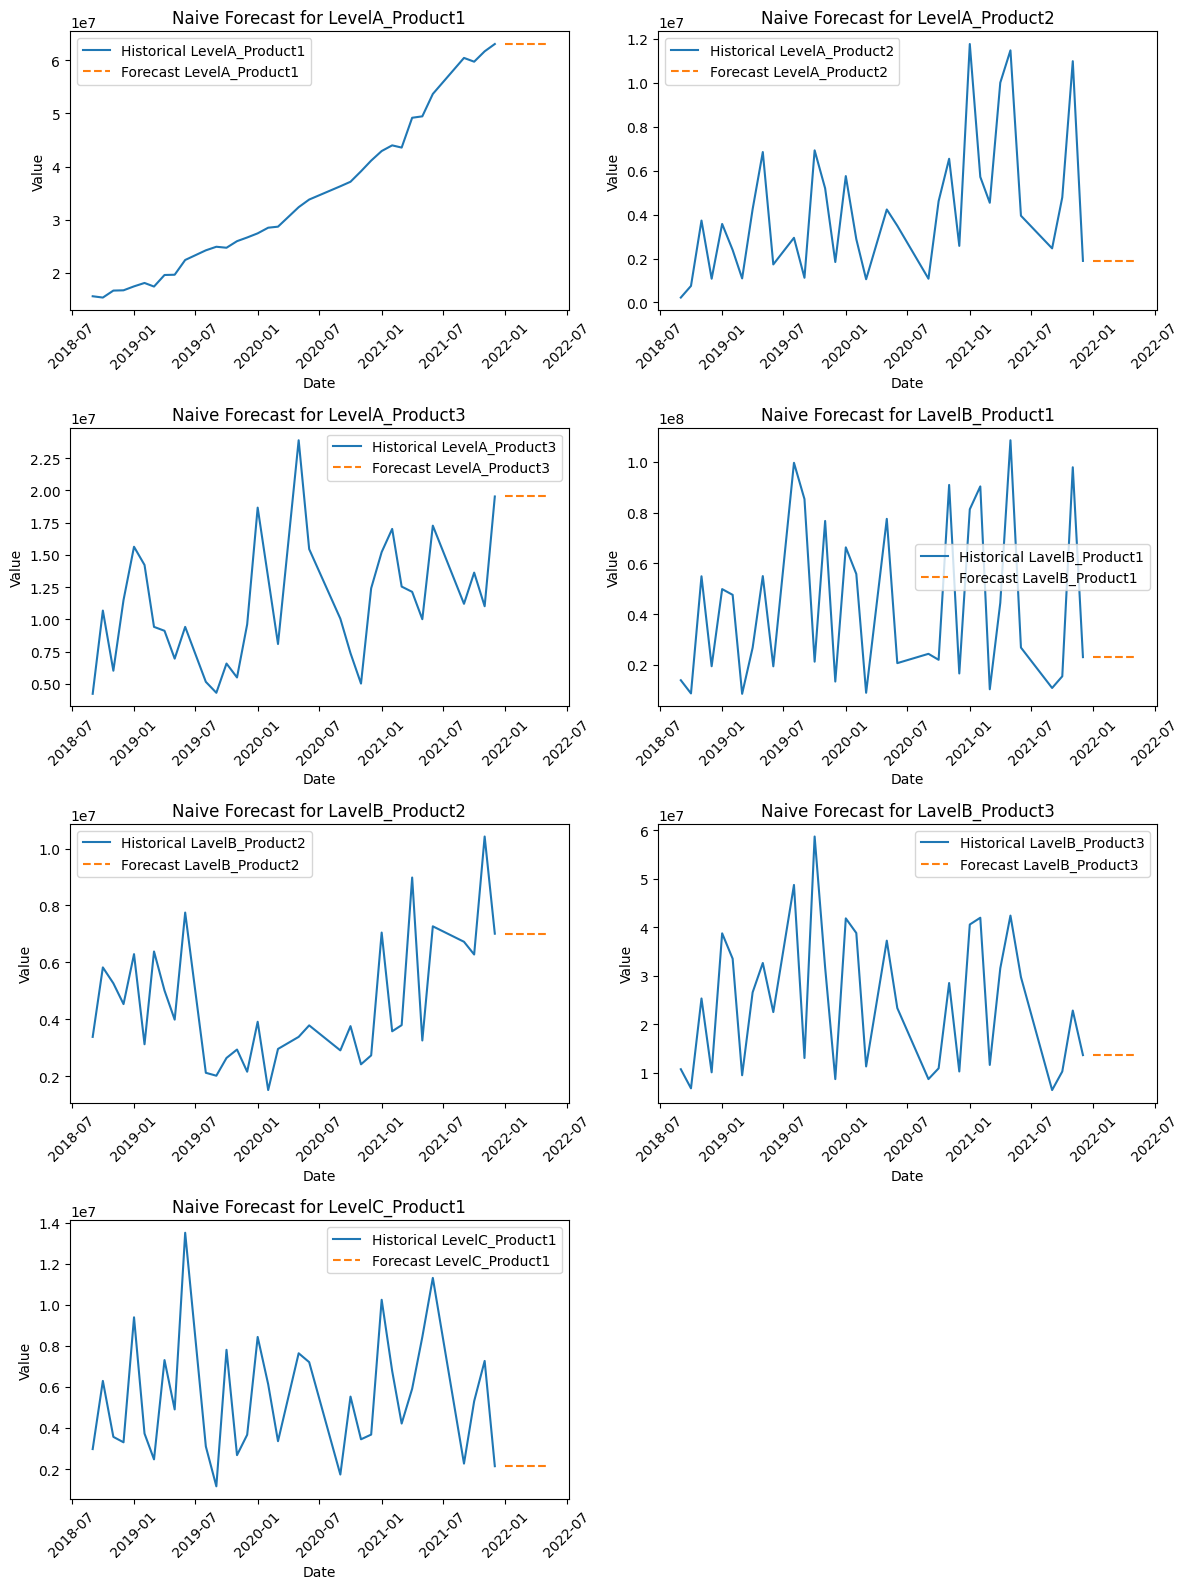


Forecast for LevelA_Product1:
2022-01-01    63045681.08
2022-02-01    63045681.08
2022-03-01    63045681.08
2022-04-01    63045681.08
2022-05-01    63045681.08
Freq: MS, Name: Forecast, dtype: float64

Forecast for LevelA_Product2:
2022-01-01    1891440.39
2022-02-01    1891440.39
2022-03-01    1891440.39
2022-04-01    1891440.39
2022-05-01    1891440.39
Freq: MS, Name: Forecast, dtype: float64

Forecast for LevelA_Product3:
2022-01-01    19525272.4
2022-02-01    19525272.4
2022-03-01    19525272.4
2022-04-01    19525272.4
2022-05-01    19525272.4
Freq: MS, Name: Forecast, dtype: float64

Forecast for LavelB_Product1:
2022-01-01    23028727.46
2022-02-01    23028727.46
2022-03-01    23028727.46
2022-04-01    23028727.46
2022-05-01    23028727.46
Freq: MS, Name: Forecast, dtype: float64

Forecast for LavelB_Product2:
2022-01-01    7006381.54
2022-02-01    7006381.54
2022-03-01    7006381.54
2022-04-01    7006381.54
2022-05-01    7006381.54
Freq: MS, Name: Forecast, dtype: float64

Fore

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/filtered_file.csv'
data = pd.read_csv(file_path)

# Convert 'keys' column to datetime and set as index
data['keys'] = pd.to_datetime(data['keys'], format='%m-%d-%Y')
data.set_index('keys', inplace=True)

# Forecast using the naive model
forecast_horizon = 5  # Forecast for the next 5 months

# Store forecasts in a dictionary
forecasts = {}

# Calculate the number of rows and columns for the subplot grid
num_columns = len(data.columns)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows based on the number of columns

# Plot each product separately and store forecasts
plt.figure(figsize=(12, 4 * num_rows))  # Adjust figure height based on the number of rows
for i, column in enumerate(data.columns):
    # Forecast using the naive model (last observation)
    last_observation = data[column].iloc[-1]
    forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq='MS')
    forecast = pd.Series([last_observation] * forecast_horizon, index=forecast_dates, name='Forecast')
    forecasts[column] = forecast

    # Plot historical data and forecast
    plt.subplot(num_rows, 2, i + 1)  # Dynamically adjust subplot grid
    plt.plot(data.index, data[column], label=f'Historical {column}')
    plt.plot(forecast.index, forecast, linestyle='--', label=f'Forecast {column}')
    plt.title(f'Naive Forecast for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# Print exact forecast values
for product, forecast in forecasts.items():
    print(f"\nForecast for {product}:")
    print(forecast)

In [ ]:
import numpy as np

def weighted_forecast(time_series_pred, ml_pred, actual):
    """
    Generates a final forecast by weighting time series and machine learning predictions
    based on their errors compared to the actual values. Handles cases where errors might be zero.

    Parameters:
    - time_series_pred: List of time series predictions
    - ml_pred: List of machine learning predictions
    - actual: List of actual values

    Returns:
    - final_forecast: List of final weighted forecast values
    """

    # Step 1: Calculate the absolute errors
    error_ts = np.abs(np.array(time_series_pred) - np.array(actual))
    error_ml = np.abs(np.array(ml_pred) - np.array(actual))

    # Step 2: Handle cases where errors are zero by setting a small epsilon value
    epsilon = 1e-10
    error_ts = np.where(error_ts == 0, epsilon, error_ts)
    error_ml = np.where(error_ml == 0, epsilon, error_ml)

    # Step 3: Calculate inverse of errors as raw weights
    weight_ts = error_ml / (error_ts + error_ml)
    weight_ml = error_ts / (error_ml + error_ts)

    # Step 4: Normalize weights
    total_weight = weight_ts + weight_ml
    weight_ts_normalized = weight_ts / total_weight
    weight_ml_normalized = weight_ml / total_weight

    # Step 5: Generate the final forecast by weighting the predictions
    final_forecast = (weight_ts_normalized * np.array(time_series_pred)) + \
                     (weight_ml_normalized * np.array(ml_pred))

    return final_forecast.tolist()

# Example usage:
time_series_pred = [1,1,1,1]
ml_pred = [1,1,1,1]
actual = [1,1,1,1]  # Perfect predictions

final_forecast = weighted_forecast(time_series_pred, ml_pred, actual)
print("Final Weighted Forecast:", final_forecast)

Final Weighted Forecast: [1.0, 1.0, 1.0, 1.0]
